In [46]:
import pandas as pd 
from enigmatoolbox.utils.useful import zscore_matrix
from enigmatoolbox.utils.parcellation import parcel_to_surface
from enigmatoolbox.plotting import plot_cortical, plot_subcortical
import numpy as np

cortical_regions = ['L_bankssts', 'L_caudalanteriorcingulate', 
 'L_caudalmiddlefrontal', 'L_cuneus', 
 'L_entorhinal', 'L_fusiform', 
 'L_inferiorparietal', 'L_inferiortemporal', 
 'L_isthmuscingulate', 'L_lateraloccipital', 
 'L_lateralorbitofrontal', 'L_lingual', 
 'L_medialorbitofrontal', 'L_middletemporal', 
 'L_parahippocampal', 'L_paracentral', 
 'L_parsopercularis', 'L_parsorbitalis', 
 'L_parstriangularis', 'L_pericalcarine', 
 'L_postcentral', 'L_posteriorcingulate', 
 'L_precentral', 'L_precuneus', 
 'L_rostralanteriorcingulate', 
 'L_rostralmiddlefrontal', 'L_superiorfrontal', 
 'L_superiorparietal', 'L_superiortemporal', 
 'L_supramarginal', 'L_frontalpole', 
 'L_temporalpole', 'L_transversetemporal', 
 'L_insula', 
 'R_bankssts', 'R_caudalanteriorcingulate', 
 'R_caudalmiddlefrontal', 'R_cuneus', 
 'R_entorhinal', 'R_fusiform', 
 'R_inferiorparietal', 'R_inferiortemporal', 
 'R_isthmuscingulate', 'R_lateraloccipital', 
 'R_lateralorbitofrontal', 'R_lingual', 
 'R_medialorbitofrontal', 'R_middletemporal', 
 'R_parahippocampal', 'R_paracentral', 
 'R_parsopercularis', 'R_parsorbitalis', 
 'R_parstriangularis', 'R_pericalcarine',
 'R_postcentral', 'R_posteriorcingulate', 
 'R_precentral', 'R_precuneus',
 'R_rostralanteriorcingulate', 'R_rostralmiddlefrontal',
 'R_superiorfrontal', 'R_superiorparietal',
 'R_superiortemporal', 'R_supramarginal',
 'R_frontalpole', 'R_temporalpole',
 'R_transversetemporal', 'R_insula']
subcortical_regions = ['Laccumb', 'Lamyg', 'Lcaud', 'Lhippo', 'Lpal', 'Lput', 'Lthal',
       'LLatVent', 'Raccumb', 'Ramyg', 'Rcaud', 'Rhippo', 'Rpal', 'Rput',
       'Rthal', 'RLatVent']
print(len(cortical_regions), len(subcortical_regions))

enigma_dk_mapping = pd.read_csv('/Users/ianliu/Medical Research/Data/Atlases/DK/desikanKilliany/enigma-dk-id.csv',
                                index_col=0)
petsurfer_enigma_mapping = dict(zip(enigma_dk_mapping['surfer-label-name'], enigma_dk_mapping['ENIGMA-label-name']))
lowercase_petsurfer_enigma_mapping = {k.lower(): v for k, v in petsurfer_enigma_mapping.items()}

df = pd.read_csv('/Users/ianliu/Medical Research/Data/Blood/derivatives/Vt_Values_Wide.csv',
                 index_col=0)
df.drop(['hippocampus'], inplace=True, axis=1)
# df = pd.read_csv('/Users/ianliu/Medical Research/Data/17-plus7/derivatives/kinfitr/Vt_Values.csv',
#                  index_col=0)


roi_df = df.drop(columns=['sub',
                          'ses',
                          'task',
                          'trc',
                          'acq',
                          'run'])

['Laccumb', 'Lamyg', 'Lcaud', 'Lhippo', 'Lpal', 'Lput', 'Lthal',
       'LLatVent', 'Raccumb', 'Ramyg', 'Rcaud', 'Rhippo', 'Rpal', 'Rput',
       'Rthal', 'RLatVent']


# roi_means = roi_df.mean(axis=0)
# roi_std = roi_df.std(axis=0)
# roi_z_score = (roi_df - roi_means) / roi_std

subj_mean = roi_df.mean(axis=1)
subj_std = roi_df.std(axis=1)

grp = [0] * df.shape[0]

controlCode = 0
roi_z_score = zscore_matrix(roi_df, grp, controlCode)

# take subject z-score
# then take mean of z-scores for each ROI
subj_z_score = pd.DataFrame()
for i in range(roi_df.shape[0]):
    subj_z_score = subj_z_score.append((roi_df.iloc[i] - subj_mean.iloc[i]) / subj_std.iloc[i])
subj_z_score
# subj_z_score.mean(axis=0).to_csv('/Users/ianliu/Medical Research/Data/Blood/derivatives/Vt_Values_Subj_Z_Score_Mean.csv')
subj_z_score.mean(axis=0).to_csv('/Users/ianliu/Medical Research/Data/17-plus7/derivatives/Vt_Values_Subj_Z_Score_Mean.csv')

# take mean of values for each ROI
# Z-score each value by mean of ROI
# take average of Z-scores for each roi 
# roi_z_score.mean(axis=0).to_csv('/Users/ianliu/Medical Research/Data/Blood/derivatives/Vt_Values_ROI_Z_Score_Mean.csv')
roi_z_score.mean(axis=0).to_csv('/Users/ianliu/Medical Research/Data/17-plus7/derivatives/Vt_Values_ROI_Z_Score_Mean.csv')

# for i in roi_df.index:
#     subj_z_score = (roi_df.loc[i] - subj_mean.loc[i]) / subj_std.loc[i]
#     print(subj_z_score)
# subj_z_score

68 16


# Mean & Subj Z Score 魚龍混雜

In [47]:
df = pd.read_csv('/Users/ianliu/Medical Research/Data/17-plus7/derivatives/Vt_Values_Wide.csv',
                 index_col=0)
df.drop(columns=['hippocampus'], inplace= True)
# change df column names to replace 
for i in df.columns:
    if i in petsurfer_enigma_mapping.keys():
        df.rename(columns={i: petsurfer_enigma_mapping[i]}, inplace=True)
    elif i.lower() in lowercase_petsurfer_enigma_mapping.keys():
        df.rename(columns={i: lowercase_petsurfer_enigma_mapping[i]}, inplace=True)
    else:
        df.rename(columns={i: i.replace('_', '-')}, inplace=True)

df.rename(columns={'aircavity': 'AirCavity',
                   'skull': 'Skull',
                   'csf_extracerebral':'CSF-ExtraCerebral',
                   'csf': 'CSF',
                   'pons': 'Pons',
                   'vermis': 'Vermis',
                   'brain-stem': 'Brain-Stem',
                   'right-amygdala': 'Ramyg',
                   'Left-Lateral-Ventricle': 'LLatVent',
                     'Right-Lateral-Ventricle': 'RLatVent',
                   }, inplace=True)
df['LLatVent'] = np.nan
df['RLatVent'] = np.nan

df.to_csv('/Users/ianliu/Medical Research/Data/17-plus7/derivatives/Vt_Values_Wide_renamed.csv',
                 index=None)

roi_df = df.drop(columns=['sub',
                          'ses',
                          'task',
                          'trc',
                          'acq',
                          'run'])
control_df = df[df['ses'] == 'baselinebrain'].copy()
blocked_df = df[df['ses'] == 'blockedbrain'].copy()
control_roi_df = control_df.drop(['sub', 'ses', 'task', 'trc', 'acq', 'run'], axis = 1)
blocked_roi_df = blocked_df.drop(['sub', 'ses', 'task', 'trc', 'acq', 'run'], axis = 1)

control_std = control_roi_df.std(axis=0)
control_mean = control_roi_df.mean(axis=0)
control_subj_mean = control_roi_df.mean(axis=1)
control_subj_std = control_roi_df.std(axis=1)
    
control_subj_z_score = pd.DataFrame()
for i in range(control_roi_df.shape[0]):
    temp = (control_roi_df.iloc[i] - control_subj_mean.iloc[i]) / control_subj_std.iloc[i]
    control_subj_z_score = control_subj_z_score.append(temp)

blocked_subj_z_score = blocked_roi_df.copy()
for i in blocked_subj_z_score.columns:
    blocked_subj_z_score[i] = (blocked_roi_df[i] - control_mean[i]) / control_std[i]


subj_z_score = pd.concat([control_subj_z_score, blocked_subj_z_score])

grp = [0 if i == "baselinebrain" else 1 for i in df['ses'] ]
blocked_indx = list(df[df['ses'] == 'blockedbrain'].index)
control_indx = list(df[df['ses'] == 'baselinebrain'].index)
controlCode = 0
roi_z_score = zscore_matrix(roi_df, grp, controlCode)

subj_mean = roi_df.mean(axis=1)
subj_std = roi_df.std(axis=1)

subj_z_score_all_same = pd.DataFrame()
for i in range(roi_df.shape[0]):
    temp = (roi_df.iloc[i] - subj_mean.iloc[i]) / subj_std.iloc[i]
    subj_z_score_all_same = subj_z_score_all_same.append((roi_df.iloc[i] - subj_mean.iloc[i]) / subj_std.iloc[i])

# temp = roi_z_score.copy()
# temp['sub'] = df['sub']
# temp['ses'] = df['ses']
# temp.to_csv('/Users/ianliu/Medical Research/Data/17-plus7/derivatives/roi_z_score.csv',
#                  index=None)



    
temp = subj_z_score.copy()
temp['sub'] = df['sub']
temp['ses'] = df['ses']
temp.to_csv('/Users/ianliu/Medical Research/Data/17-plus7/derivatives/subj_z_score.csv',
                 index=None)

# temp = subj_z_score.copy()
# temp['sub'] = df['sub']
# temp['ses'] = df['ses']
# temp = temp[temp['ses'] == 'blockedbrain']
# temp.to_csv('/Users/ianliu/Medical Research/Data/17-plus7/derivatives/subj_z_score_blockedbrain_renamed.csv',
#                  index=None)

# temp = subj_z_score.copy()
# temp['sub'] = df['sub']
# temp['ses'] = df['ses']
# temp = temp[temp['ses'] == 'baselinebrain']
# temp.to_csv('/Users/ianliu/Medical Research/Data/17-plus7/derivatives/subj_z_score_blockedbrain_renamed.csv',
#                  index=None)

# temp = subj_z_score.copy()
# temp['sub'] = df['sub']
# temp['ses'] = df['ses']
# temp = temp[temp['ses'] == 'blockedbrain']
# temp.mean(axis=0).to_csv('/Users/ianliu/Medical Research/Data/17-plus7/derivatives/subj_z_score_blockedbrain_mean.csv',)

In [48]:
control_mean_zscore = roi_z_score.loc[control_indx].mean(axis=0)
blocked_mean_zscore = roi_z_score.loc[blocked_indx].mean(axis=0)
control_subcortical = control_mean_zscore[subcortical_regions]
blocked_subcortical = blocked_mean_zscore[subcortical_regions]
control_cortical = control_mean_zscore[cortical_regions]
blocked_cortical = blocked_mean_zscore[cortical_regions]

control_mean_subj_z_score = subj_z_score.loc[control_indx].mean(axis=0)
blocked_mean_subj_z_score = subj_z_score.loc[blocked_indx].mean(axis=0)
control_mean_subj_z_score_all_same = subj_z_score_all_same.loc[control_indx].mean(axis=0)
blocked_mean_subj_z_score_all_same = subj_z_score_all_same.loc[blocked_indx].mean(axis=0)

control_subcortical_subj_z_score = control_mean_subj_z_score[subcortical_regions]
blocked_subcortical_subj_z_score = blocked_mean_subj_z_score[subcortical_regions]
control_cortical_subj_z_score = control_mean_subj_z_score[cortical_regions]
blocked_cortical_subj_z_score = blocked_mean_subj_z_score[cortical_regions]

control_cortical_subj_z_score_all_same = control_mean_subj_z_score_all_same[cortical_regions]
blocked_cortical_subj_z_score_all_same = blocked_mean_subj_z_score_all_same[cortical_regions]
control_subcortical_subj_z_score_all_same = control_mean_subj_z_score_all_same[subcortical_regions]
blocked_subcortical_subj_z_score_all_same = blocked_mean_subj_z_score_all_same[subcortical_regions]

In [49]:
control_mean_subj_z_score.to_csv('/Users/ianliu/Medical Research/Data/17-plus7/derivatives/baseline_mean_subj_z_score.csv')
blocked_mean_subj_z_score.to_csv('/Users/ianliu/Medical Research/Data/17-plus7/derivatives/blocked_mean_subj_z_score.csv')
control_subcortical_subj_z_score.to_csv('/Users/ianliu/Medical Research/Data/17-plus7/derivatives/baseline_subcortical_mean_subj_z_score.csv')
blocked_subcortical_subj_z_score.to_csv('/Users/ianliu/Medical Research/Data/17-plus7/derivatives/blocked_subcortical_mean_subj_z_score.csv')
control_cortical_subj_z_score.to_csv('/Users/ianliu/Medical Research/Data/17-plus7/derivatives/baseline_cortical_mean_subj_z_score.csv')
blocked_cortical_subj_z_score.to_csv('/Users/ianliu/Medical Research/Data/17-plus7/derivatives/blocked_cortical_mean_subj_z_score.csv')

In [16]:
from scipy import stats
# Mean Z-Score of Each Group
stats.ttest_rel(control_mean_subj_z_score.dropna(), blocked_mean_subj_z_score.dropna())

TtestResult(statistic=8.478530370036038, pvalue=1.9721915912550981e-13, df=101)

In [19]:
# Mean of Each Group
stats.ttest_rel(control_df.drop(['sub', 'ses', 'task', 'trc', 'acq', 'run'], axis=1).mean(axis=0).dropna(), 
                blocked_df.drop(['sub', 'ses', 'task', 'trc', 'acq', 'run'], axis=1).mean(axis=0).dropna())

TtestResult(statistic=22.517193040638276, pvalue=3.6944352540669124e-41, df=101)

In [36]:
# Actual Vt values of 6 subjects 
control_testing = control_df[control_df['sub'].isin(['PSBB01', 'PSBB02', 'PSBB03', 'PSBB05', 'PSBB06', 'PSBB07'])]
blocked_testing = blocked_df[blocked_df['sub'].isin(['PSBB01', 'PSBB02', 'PSBB03', 'PSBB05', 'PSBB06', 'PSBB07'])]
control_testing = control_testing.drop(
    ['sub', 'ses', 'task', 'trc', 'acq', 'run'], axis=1)
blocked_testing = blocked_testing.drop(
    ['sub', 'ses', 'task', 'trc', 'acq', 'run'], axis=1)
control_testing = control_testing.to_numpy().flatten()
blocked_testing = blocked_testing.to_numpy().flatten()
# remove na values
control_testing = control_testing[~np.isnan(control_testing)]
blocked_testing = blocked_testing[~np.isnan(blocked_testing)]
stats.ttest_rel(control_testing, blocked_testing)

TtestResult(statistic=46.034281622914826, pvalue=8.788489516723101e-201, df=611)

## Baseline

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


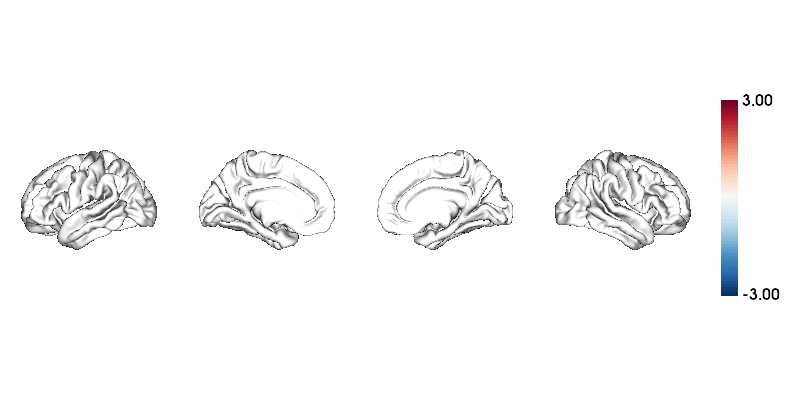

In [93]:
# Before visualizing the data, we need to map the parcellated data to the surface
CT_z_mean_fsa5 = parcel_to_surface(control_cortical, 'aparc_fsa5')

# Project the results on the surface brain
plot_cortical(array_name=CT_z_mean_fsa5, surface_name="fsa5", size=(800, 400),
              # cmap='Blues_r', 
              cmap ="RdBu_r",
              color_bar=True, 
              color_range=(-3, 3), 
              embed_nb=True,
              )

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


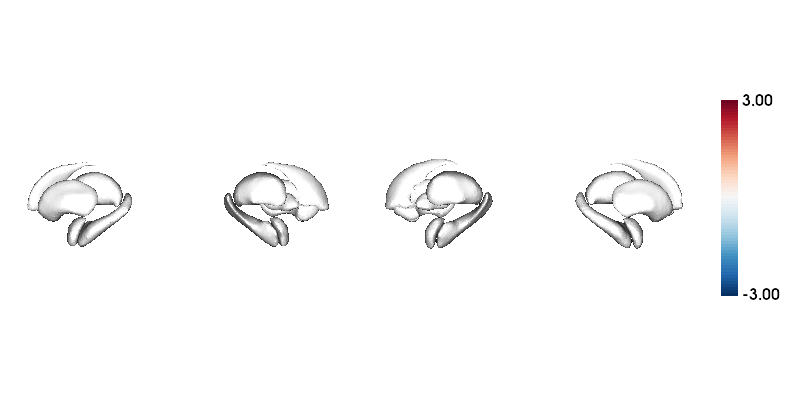

In [94]:
# Project the results on the surface brain
plot_subcortical(array_name=control_subcortical, size=(800, 400),
                 cmap='RdBu_r', color_bar=True, 
                 color_range=(-3, 3), 
                embed_nb=True)

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


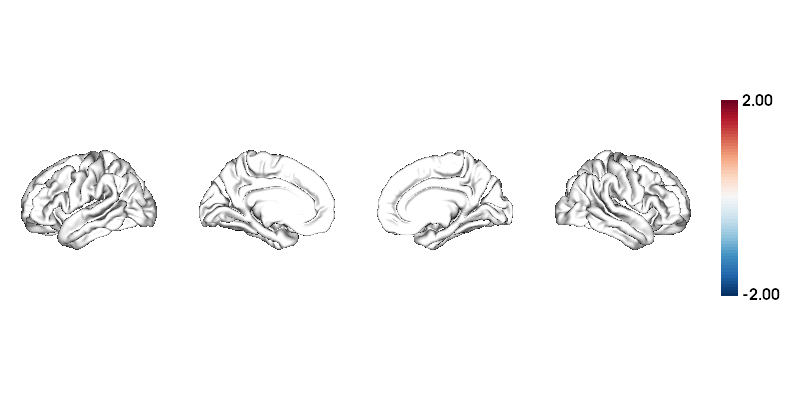

In [95]:
# Before visualizing the data, we need to map the parcellated data to the surface
CT_z_mean_fsa5 = parcel_to_surface(control_cortical, 'aparc_fsa5')

# Project the results on the surface brain
plot_cortical(array_name=CT_z_mean_fsa5, surface_name="fsa5", size=(800, 400),
              cmap ="RdBu_r",
              color_bar=True, 
            color_range=(-2, 2),  

              embed_nb=True,
              )

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


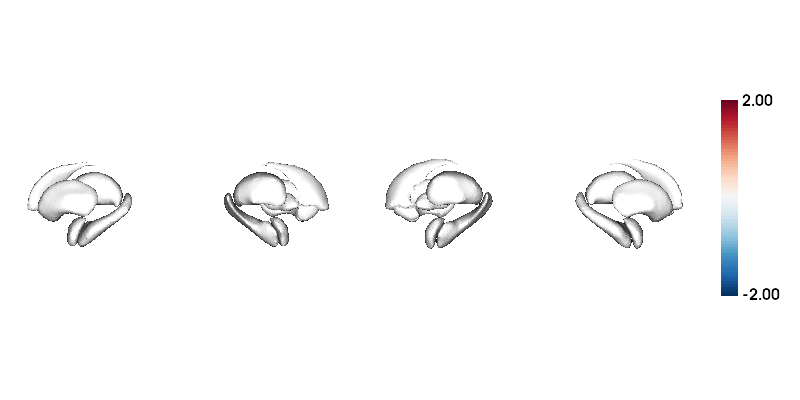

In [96]:
# Project the results on the surface brain
plot_subcortical(array_name=control_subcortical, size=(800, 400),
                 cmap='RdBu_r', color_bar=True, 
                color_range=(-2, 2),  

                embed_nb=True)

## Blocked

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


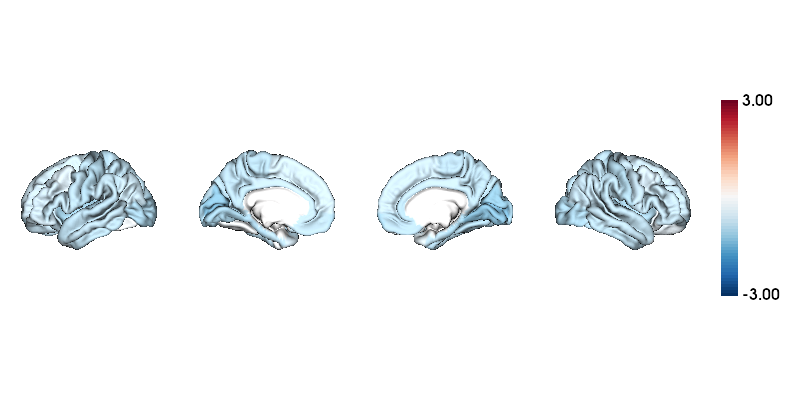

In [97]:
# Before visualizing the data, we need to map the parcellated data to the surface
CT_z_mean_fsa5 = parcel_to_surface(blocked_cortical, 'aparc_fsa5')

# Project the results on the surface brain
plot_cortical(array_name=CT_z_mean_fsa5, surface_name="fsa5", size=(800, 400),
              cmap ="RdBu_r",
              color_bar=True, 
              color_range=(-3, 3), 
              embed_nb=True,
              )

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


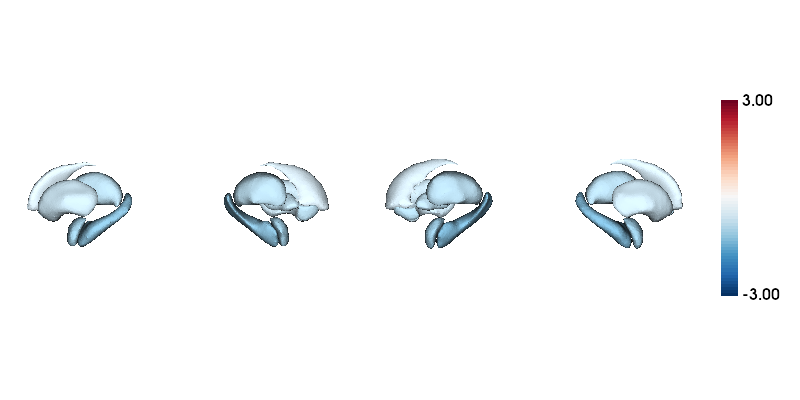

In [98]:
# Project the results on the surface brain
plot_subcortical(array_name=blocked_subcortical, size=(800, 400),
                 cmap='RdBu_r', color_bar=True, 
                 color_range=(-3, 3), 
                embed_nb=True)

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


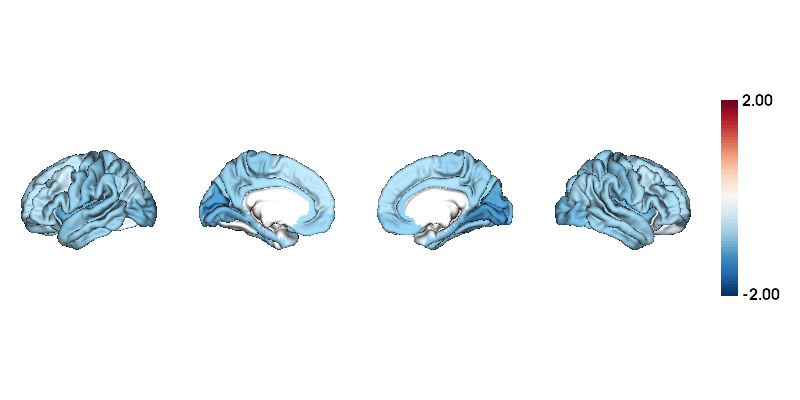

In [99]:
# Before visualizing the data, we need to map the parcellated data to the surface
CT_z_mean_fsa5 = parcel_to_surface(blocked_cortical, 'aparc_fsa5')

# Project the results on the surface brain
plot_cortical(array_name=CT_z_mean_fsa5, surface_name="fsa5", size=(800, 400),
              cmap ="RdBu_r",
              color_bar=True,
              color_range=(-2, 2),  
              embed_nb=True,
              )

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


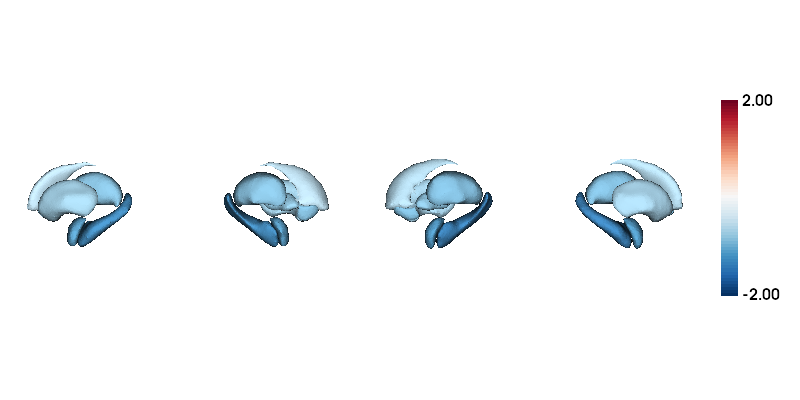

In [100]:
# Project the results on the surface brain
plot_subcortical(array_name=blocked_subcortical, size=(800, 400),
                 cmap='RdBu_r', color_bar=True, 
                color_range=(-2, 2),  
                embed_nb=True)

## Baseline Subj Z Score 

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


/Users/ianliu/OtherCodingProjects/ENIGMA/enigmatoolbox/plotting/base.py:294: UserWarning: Support for interactive mode is only provided for a single renderer: 'nrow=1' and 'ncol=1'. Setting 'interactive=False'
  warnings.warn("Support for interactive mode is only provided for "


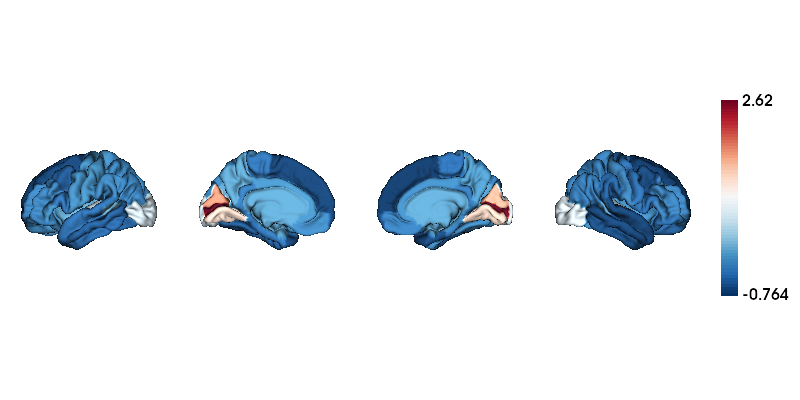

In [412]:
# Before visualizing the data, we need to map the parcellated data to the surface
CT_z_mean_fsa5 = parcel_to_surface(control_cortical_subj_z_score, 'aparc_fsa5')

# Project the results on the surface brain
plot_cortical(array_name=CT_z_mean_fsa5, surface_name="fsa5", size=(800, 400),
              # cmap='Blues_r', 
              cmap ="RdBu_r",
              color_bar=True, 
              embed_nb=True,
              )

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


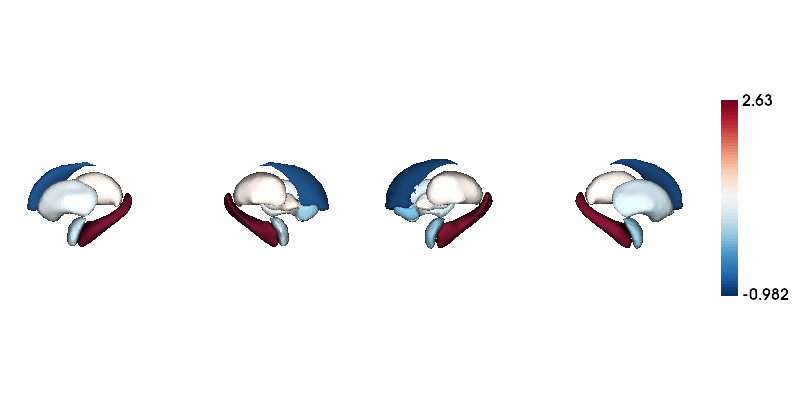

In [413]:
# Project the results on the surface brain
plot_subcortical(array_name=control_subcortical_subj_z_score, size=(800, 400),
                 cmap='RdBu_r', color_bar=True, 
                embed_nb=True)

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


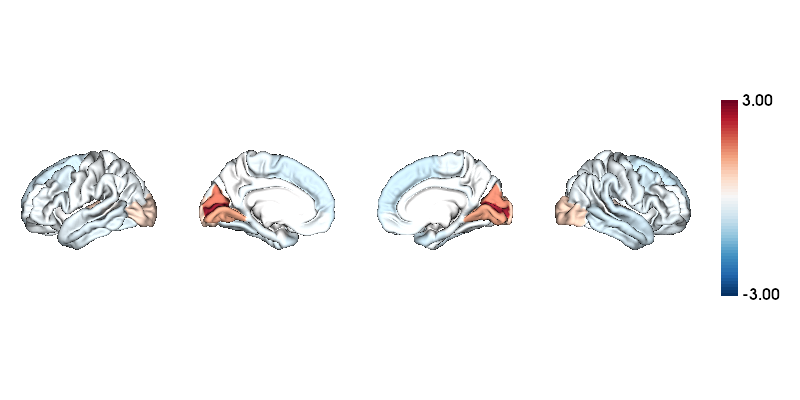

In [414]:
# Before visualizing the data, we need to map the parcellated data to the surface
CT_z_mean_fsa5 = parcel_to_surface(control_cortical_subj_z_score, 'aparc_fsa5')

# Project the results on the surface brain
plot_cortical(array_name=CT_z_mean_fsa5, surface_name="fsa5", size=(800, 400),
              # cmap='Blues_r', 
              cmap ="RdBu_r",
              color_bar=True, 
              color_range=(-3, 3), 
              embed_nb=True,
              )

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


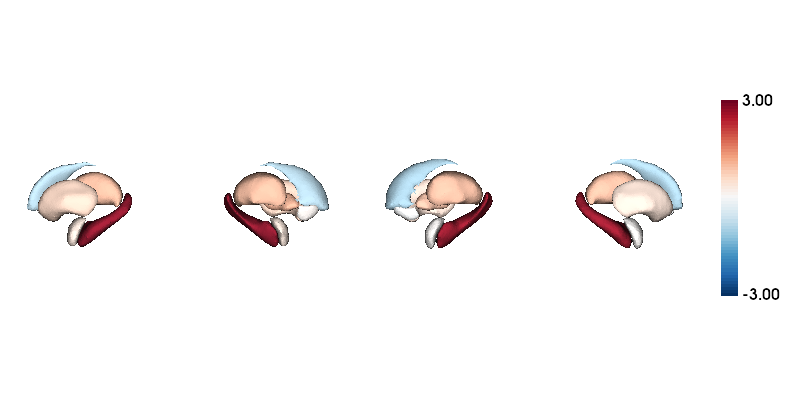

In [415]:
# Project the results on the surface brain
plot_subcortical(array_name=control_subcortical_subj_z_score, size=(800, 400),
                 cmap='RdBu_r', color_bar=True, 
                 color_range=(-3, 3), 
                embed_nb=True)

## Blocked Subj Z Score

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


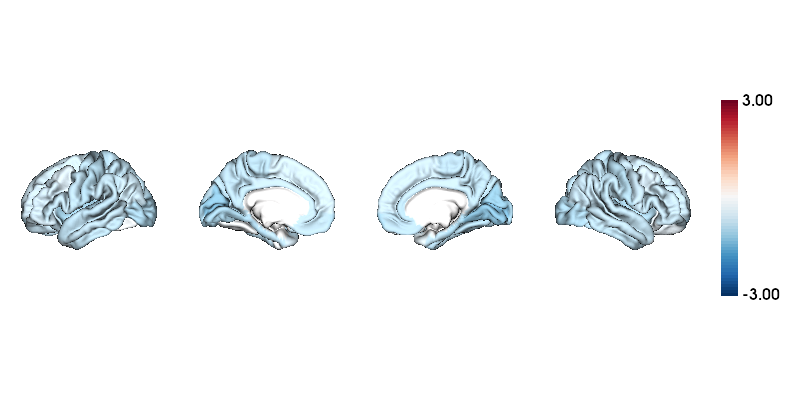

In [416]:
# Before visualizing the data, we need to map the parcellated data to the surface
CT_z_mean_fsa5 = parcel_to_surface(blocked_cortical_subj_z_score, 'aparc_fsa5')

# Project the results on the surface brain
plot_cortical(array_name=CT_z_mean_fsa5, surface_name="fsa5", size=(800, 400),
              cmap ="RdBu_r",
              color_bar=True, 
              color_range=(-3, 3), 
              embed_nb=True,
              )

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


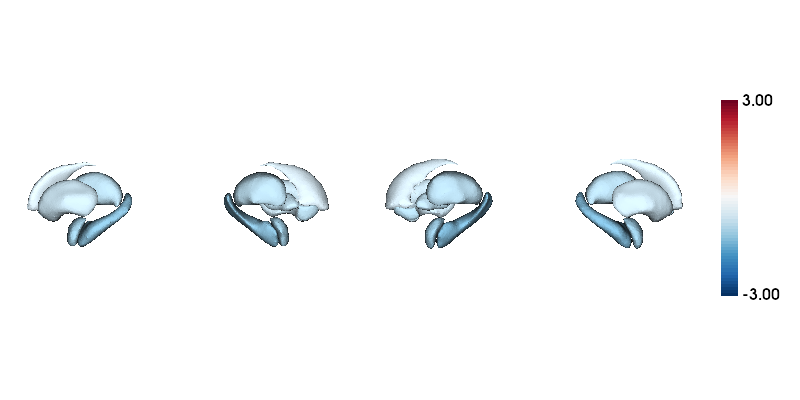

In [417]:
# Project the results on the surface brain
plot_subcortical(array_name=blocked_subcortical_subj_z_score, size=(800, 400),
                 cmap='RdBu_r', color_bar=True, 
                 color_range=(-3, 3), 
                embed_nb=True)

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


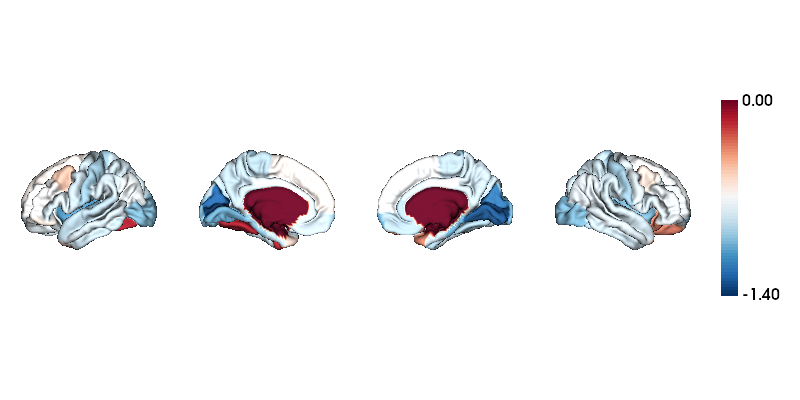

In [418]:
# Before visualizing the data, we need to map the parcellated data to the surface
CT_z_mean_fsa5 = parcel_to_surface(blocked_cortical_subj_z_score, 'aparc_fsa5')

# Project the results on the surface brain
plot_cortical(array_name=CT_z_mean_fsa5, surface_name="fsa5", size=(800, 400),
              cmap ="RdBu_r",
              color_bar=True, 
              embed_nb=True,
              )

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


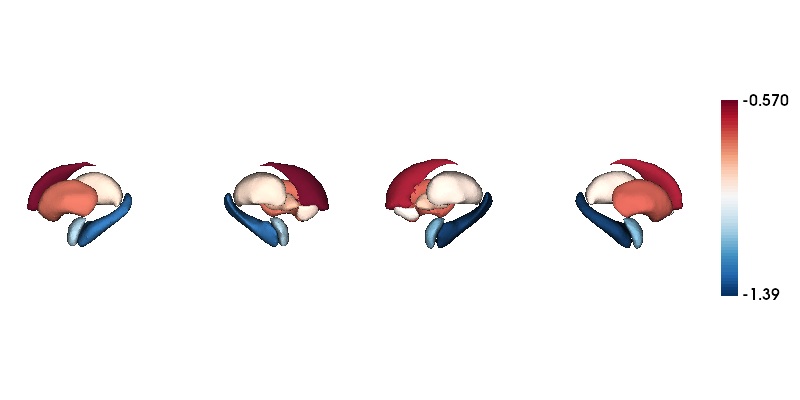

In [419]:
# Project the results on the surface brain
plot_subcortical(array_name=blocked_subcortical_subj_z_score, size=(800, 400),
                 cmap='RdBu_r', color_bar=True, 
                embed_nb=True)

## Blocked All Same (Treated as Baseline)

In [ ]:
blocked_cortical_subj_z_score_all_same

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


/Users/ianliu/OtherCodingProjects/ENIGMA/enigmatoolbox/plotting/base.py:294: UserWarning: Support for interactive mode is only provided for a single renderer: 'nrow=1' and 'ncol=1'. Setting 'interactive=False'
  warnings.warn("Support for interactive mode is only provided for "


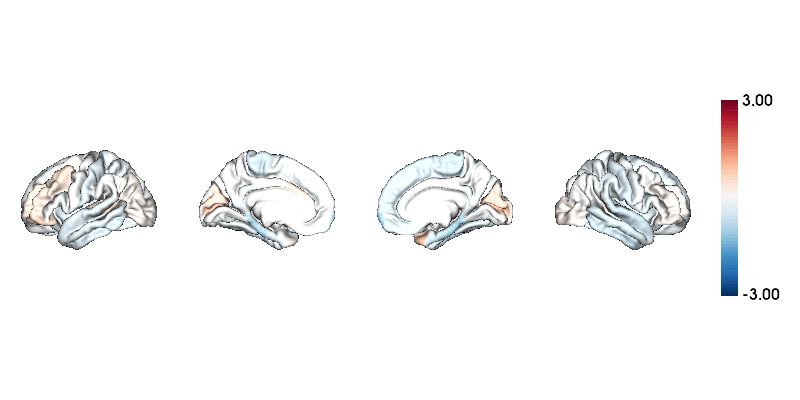

In [424]:
# Before visualizing the data, we need to map the parcellated data to the surface
CT_z_mean_fsa5 = parcel_to_surface(blocked_cortical_subj_z_score_all_same, 'aparc_fsa5')

# Project the results on the surface brain
plot_cortical(array_name=CT_z_mean_fsa5, surface_name="fsa5", size=(800, 400),
              cmap ="RdBu_r",
              color_bar=True, 
              color_range=(-3, 3), 
              embed_nb=True,
              )

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


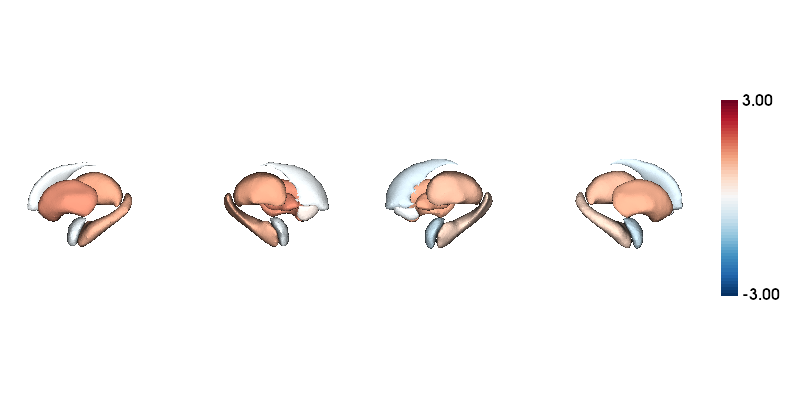

In [425]:
# Project the results on the surface brain
plot_subcortical(array_name=blocked_subcortical_subj_z_score_all_same, size=(800, 400),
                 cmap='RdBu_r', color_bar=True, 
                 color_range=(-3, 3), 
                embed_nb=True)

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


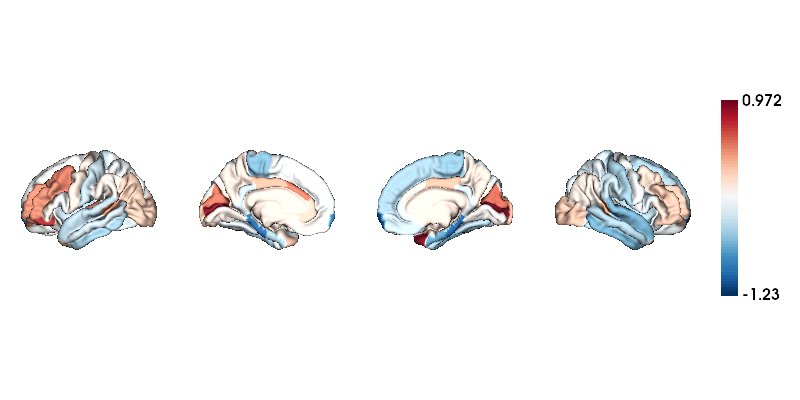

In [426]:
# Before visualizing the data, we need to map the parcellated data to the surface
CT_z_mean_fsa5 = parcel_to_surface(blocked_cortical_subj_z_score_all_same, 'aparc_fsa5')

# Project the results on the surface brain
plot_cortical(array_name=CT_z_mean_fsa5, surface_name="fsa5", size=(800, 400),
              cmap ="RdBu_r",
              color_bar=True, 
            #   color_range=(-3, 3), 
              embed_nb=True,
              )

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


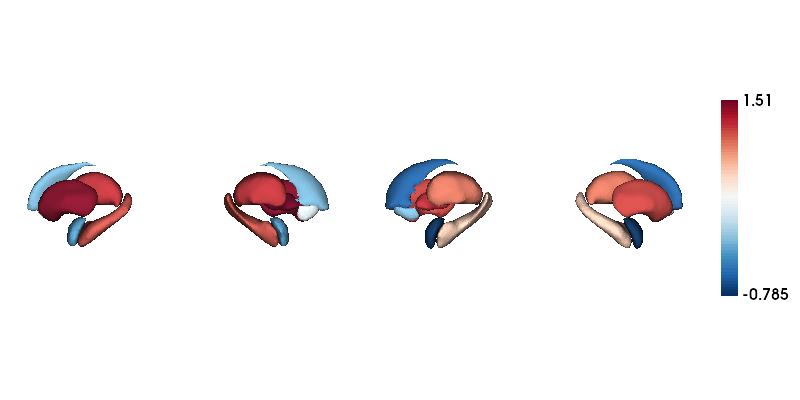

In [427]:
# Project the results on the surface brain
plot_subcortical(array_name=blocked_subcortical_subj_z_score_all_same, size=(800, 400),
                 cmap='RdBu_r', color_bar=True, 
                #  color_range=(-3, 3), 
                embed_nb=True)

# Minus Reference

In [2]:
new_roi_df = roi_df.copy()
new_roi_df.drop(['reference'], axis=1, inplace=True)
for i in new_roi_df.columns:
    new_roi_df[i] = (new_roi_df[i]-   roi_df['reference']) / roi_df['reference']
new_roi_df


aircavity  brain_stem       csf  csf_extracerebral  ctx_lh_bankssts  \
1   -0.262937    0.213571  0.062611          -0.048465         0.277323   
2   -0.523034    0.181471 -0.035497          -0.176135         0.002151   
3   -0.496540    0.135709 -0.255940          -0.087943         0.168159   
4   -0.610461    0.109638 -0.106287          -0.192566         0.181597   
5   -0.552130    0.141255 -0.133650          -0.307282         0.155600   
6   -0.622622    0.118766  0.000653          -0.267214         0.112354   
7   -0.547427    0.163439 -0.064545          -0.099022         0.059228   
8   -0.335075    0.114669 -0.068449          -0.067755         0.025203   
9   -0.411455    0.081479  0.114974          -0.144337         0.137438   
10  -0.355787    0.138593 -0.081740          -0.069853         0.197580   
11  -0.116757    0.236955 -0.053611          -0.112165         0.160555   
12   0.085044   -0.161499 -0.156190          -0.072615         0.198789   
13  -0.482991    0.106924 -0.281825          -0.216944         0.080611   
14  -0.485647    0.143994 -0.333971          -0.251079         0.114634   
15  -0.528078    0.155091 -0.220797          -0.195581         0.120330   
16  -0.548572    0.131260 -0.035379          -0.249642         0.015394   
17  -0.391432   -0.047565 -0.278691          -0.112791         0.129752   
18  -0.395227    0.183096 -0.121816          -0.186435         0.174928   
19  -0.467573    0.035270 -0.237391          -0.189371         0.122901   
20  -0.457463    0.284012 -0.153317          -0.055828         0.263557   
21  -0.430530    0.021303 -0.339574          -0.070489         0.165116   
22  -0.423380    0.125970 -0.447000          -0.232263         0.168856   
23  -0.462504   -0.009736 -0.472752          -0.249508         0.159443   
24  -0.295068    0.224672 -0.073070          -0.160802         0.102169   
25  -0.328063   -0.051270 -0.214833          -0.142886         0.122429   
26  -0.449099    0.182068 -0.229160          -0.196681         0.193391   
27  -0.448391   -0.053910 -0.326413          -0.111909         0.041629   
28  -0.532295    0.053500 -0.087178          -0.177799         0.051965   
29  -0.355306   -0.100465 -0.227482          -0.100511         0.067208   

    ctx_lh_caudalanteriorcingulate  ctx_lh_caudalmiddlefrontal  ctx_lh_cuneus  \
1                         0.292234                    0.133862       0.625880   
2                        -0.021611                   -0.006334       0.278457   
3                         0.092850                    0.012350       0.490577   
4                         0.184022                    0.062558       0.611820   
5                         0.090295                   -0.011677       0.501715   
6                         0.052850                   -0.017760       0.213391   
7                         0.057810                   -0.096110       0.248708   
8                         0.058441                    0.002898       0.415807   
9                         0.057956                    0.052025       0.685191   
10                        0.148878                    0.021365       0.665115   
11                        0.088366                    0.018014       0.569702   
12                        0.210821                    0.160386       0.183021   
13                        0.049270                    0.002152       0.431601   
14                        0.057966                   -0.013314       0.543173   
15                        0.125169                    0.021107       0.507562   
16                       -0.006680                   -0.442674       0.185493   
17                        0.096950                    0.137581       0.078250   
18                        0.116913                    0.071076       0.450403   
19                        0.206273                    0.146177       0.132928   
20                        0.186274                    0.210888       0.651452   
21                        0.136340                  

In [3]:
grp = [0] * df.shape[0]
controlCode = 0
print(zscore_matrix(new_roi_df, grp, controlCode).mean(axis=0).min().round(2), 
zscore_matrix(new_roi_df, grp, controlCode).mean(axis=0).max().round(2))

-0.0 0.0


# ROI ZScore -> Median

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


/Users/ianliu/OtherCodingProjects/ENIGMA/enigmatoolbox/plotting/base.py:294: UserWarning: Support for interactive mode is only provided for a single renderer: 'nrow=1' and 'ncol=1'. Setting 'interactive=False'
  warnings.warn("Support for interactive mode is only provided for "


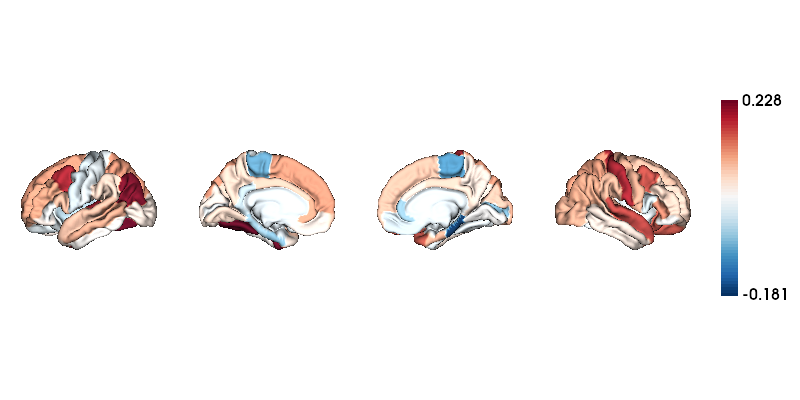

In [8]:
roi_median = roi_z_score.median(axis=0).round(4).to_frame().join(enigma_dk_mapping.set_index('surfer-label-name'), how = "right").reset_index()
roi_median.drop(columns=['index', 'ENIGMA-label-name2'], inplace=True)
roi_median = roi_median.set_index('ENIGMA-label-name')

enigma_CT_input = roi_median.loc[cortical_regions].squeeze()
enigma_SC_input = roi_median.loc[subcortical_regions].squeeze()

# Before visualizing the data, we need to map the parcellated data to the surface
CT_z_mean_fsa5 = parcel_to_surface(enigma_CT_input, 'aparc_fsa5')

# Project the results on the surface brain
fig = plot_cortical(array_name=CT_z_mean_fsa5, surface_name="fsa5", size=(800, 400),
              cmap='RdBu_r', color_bar=True, 
              # color_range=(-3,3),
              embed_nb=True)
fig

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


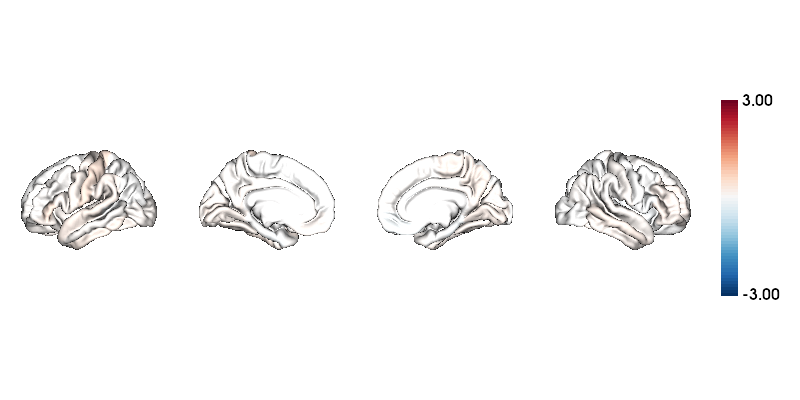

In [6]:
# Project the results on the surface brain
fig = plot_cortical(array_name=CT_z_mean_fsa5, surface_name="fsa5", size=(800, 400),
              cmap='RdBu_r', color_bar=True, 
              color_range=(-3,3),
              embed_nb=True)
fig

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


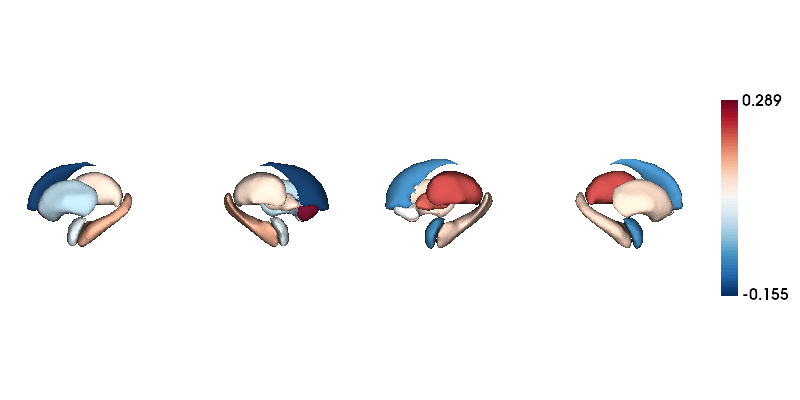

In [7]:
# Project the results on the surface brain
plot_subcortical(array_name=enigma_SC_input, size=(800, 400),
                 cmap='RdBu_r', color_bar=True, 
                #  color_range=(-3, 3), 
              #   color_range=(-1.15, 1.15),
                embed_nb=True)

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


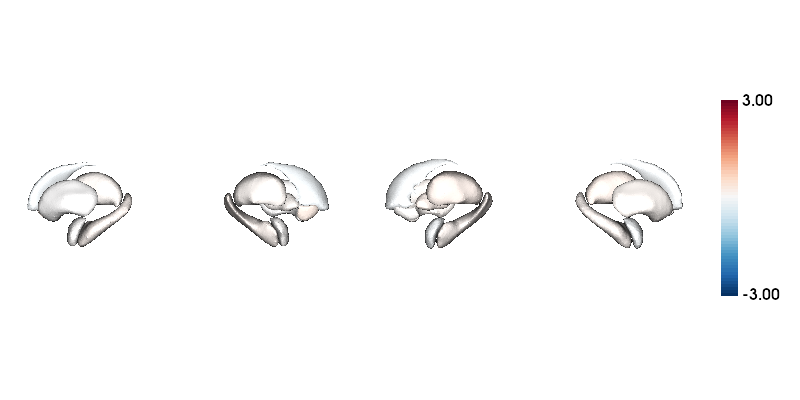

In [8]:
# Project the results on the surface brain
plot_subcortical(array_name=enigma_SC_input, size=(800, 400),
                 cmap='RdBu_r', color_bar=True, 
                 color_range=(-3, 3), 
              #   color_range=(-1.15, 1.15),
                embed_nb=True)

# SUBJ ZSCORE

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


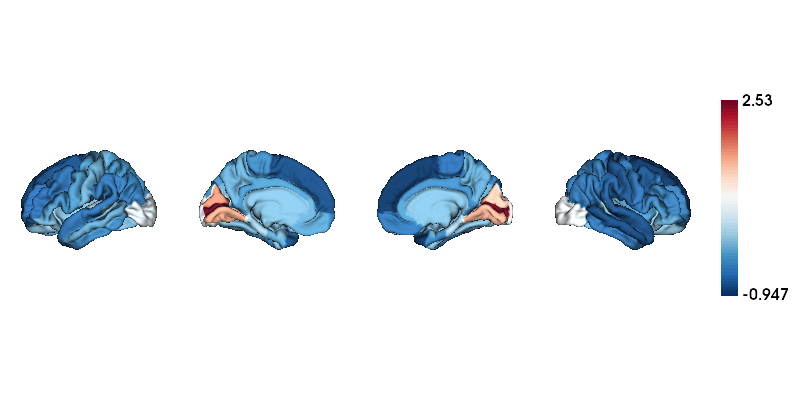

In [9]:
subj_mean = subj_z_score.mean(axis=0).to_frame().join(enigma_dk_mapping.set_index('surfer-label-name'), how = "right").reset_index()
subj_mean.drop(columns=['index', 'ENIGMA-label-name2'], inplace=True)
subj_mean = subj_mean.set_index('ENIGMA-label-name')

enigma_CT_input = subj_mean.loc[cortical_regions].squeeze()
enigma_SC_input = subj_mean.loc[subcortical_regions].squeeze()

# Before visualizing the data, we need to map the parcellated data to the surface
CT_z_mean_fsa5 = parcel_to_surface(enigma_CT_input, 'aparc_fsa5')

# Project the results on the surface brain
fig = plot_cortical(array_name=CT_z_mean_fsa5, surface_name="fsa5", size=(800, 400),
              cmap='RdBu_r', color_bar=True, 
              # color_range=(-3,3),
              embed_nb=True)
fig

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


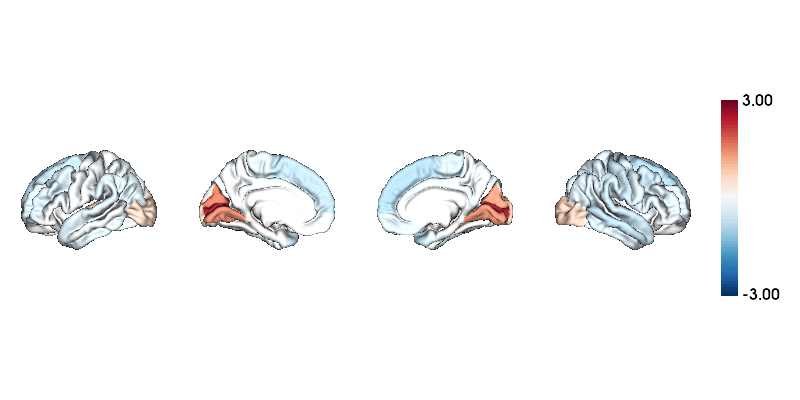

In [10]:
# Project the results on the surface brain
fig = plot_cortical(array_name=CT_z_mean_fsa5, surface_name="fsa5", size=(800, 400),
              cmap='RdBu_r', color_bar=True, 
              color_range=(-3,3),
              embed_nb=True)
fig

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


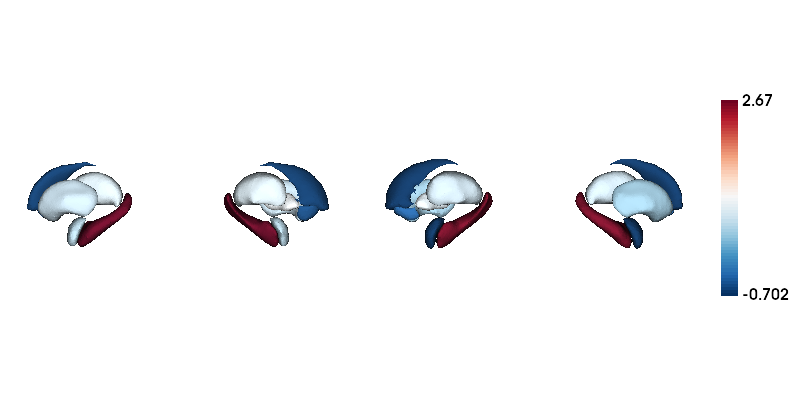

In [11]:
# Project the results on the surface brain
plot_subcortical(array_name=enigma_SC_input, size=(800, 400),
                 cmap='RdBu_r', color_bar=True, 
                #  color_range=(-3, 3), 
              #   color_range=(-1.15, 1.15),
                embed_nb=True)

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


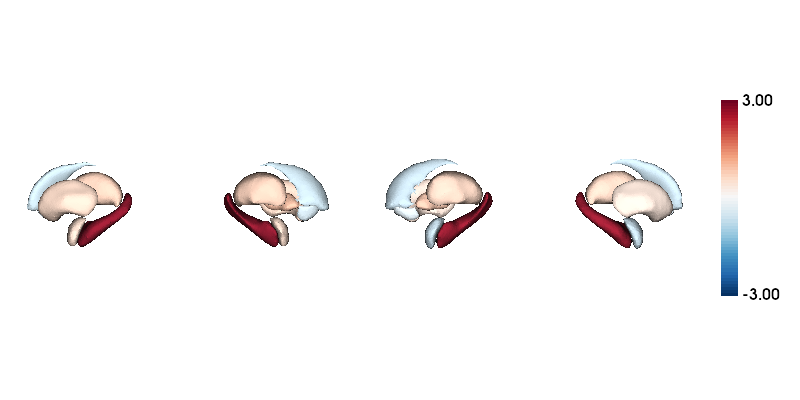

In [12]:
# Project the results on the surface brain
plot_subcortical(array_name=enigma_SC_input, size=(800, 400),
                 cmap='RdBu_r', color_bar=True, 
                 color_range=(-3, 3), 
              #   color_range=(-1.15, 1.15),
                embed_nb=True)

# By Subject

In [13]:
# temp = df.drop(columns=[
#     'ses',
#     'task',
#     'trc',
#     'acq',
#     'run'])

temp = roi_z_score
temp['sub'] = df['sub']

temp.set_index('sub', inplace=True)
temp = temp.T
temp.reset_index(inplace=True)
temp.rename(columns={'index': 'surfer-label-name'}, inplace=True)
temp.set_index('surfer-label-name', inplace=True)

# right join with enigma_dk_mapping
temp = temp.join(
        enigma_dk_mapping.set_index('surfer-label-name'),
        how = "right",
    )
temp.reset_index(inplace=True)
temp.set_index('ENIGMA-label-name', inplace=True)
temp.drop(columns=['surfer-label-name', 'ENIGMA-label-name2'], inplace=True)
temp

PS17      PS19      PS20      PS21      PS23  \
ENIGMA-label-name                                                             
L_bankssts                -2.496745 -0.372668  0.654578 -0.309017 -0.641269   
L_caudalanteriorcingulate -2.283189 -0.573745  0.643687 -0.320878 -0.812791   
L_caudalmiddlefrontal     -2.110422 -0.604649  0.474570 -0.711566 -0.525851   
L_cuneus                  -2.267468 -0.402238  0.763390 -0.355952 -1.040804   
L_entorhinal              -2.052153 -0.256042  0.071055 -0.505899 -0.613304   
...                             ...       ...       ...       ...       ...   
Rhippo                    -2.351881 -0.892235  1.300260 -0.332428 -0.427957   
RLatVent                        NaN       NaN       NaN       NaN       NaN   
Rpal                      -2.344716 -0.606974  0.579364 -0.501071 -0.567389   
Rput                      -2.306602 -0.357123  0.475470 -0.624221 -0.553886   
Rthal                     -2.391667 -0.854597  0.671927 -0.222121 -0.411935   

                               PS24      PS26      PS27      PS28      PS38  \
ENIGMA-label-name                                                             
L_bankssts                 1.015555  0.164751  1.087182 -0.401739  0.529770   
L_caudalanteriorcingulate  1.051130  0.812909  1.064256 -0.371329  0.275280   
L_caudalmiddlefrontal      1.256833  1.181739  0.761073 -0.747167  0.609454   
L_cuneus                   0.263887  0.527584  1.548526 -0.437453  0.536988   
L_entorhinal               1.575370  1.299343  0.601682 -0.686974  0.590966   
...                             ...       ...       ...       ...       ...   
Rhippo                     0.475866  0.011414  0.633773 -0.473182  0.681198   
RLatVent                        NaN       NaN       NaN       NaN       NaN   
Rpal                       0.907646  0.477379  1.025072 -0.693960  0.771107   
Rput                       1.154343  0.561638  0.969864 -0.694739  0.520313   
Rthal                      0.627891  0.702586  1.171598 -0.728218  0.219366   

                               PS39      PS40  
ENIGMA-label-name                              
L_bankssts                -0.212501  0.982103  
L_caudalanteriorcingulate -0.462214  0.976884  
L_caudalmiddlefrontal     -0.340129  0.756114  
L_cuneus                   0.040895  0.822647  
L_entorhinal              -0.617175  0.593130  
...                             ...       ...  
Rhippo                     0.225786  1.149385  
RLatVent                        NaN       NaN  
Rpal                      -0.067258  1.020799  
Rput                      -0.251536  1.106480  
Rthal                      0.219112  0.996057  

[84 rows x 12 columns]

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


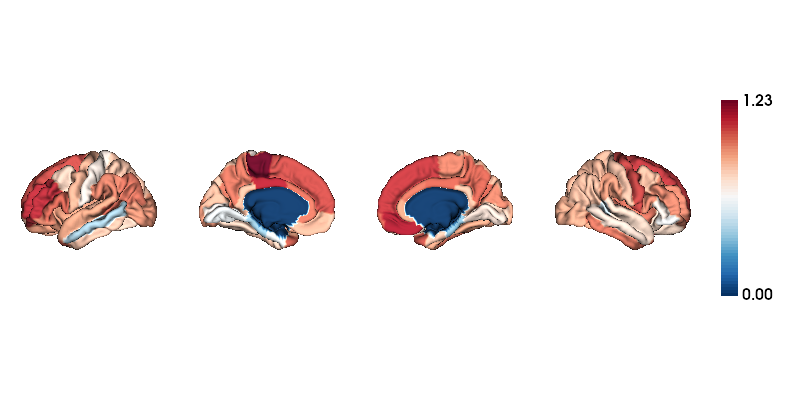

In [58]:
subj_id = 'PS40'
enigma_CT_input = temp[subj_id].loc[cortical_regions]
enigma_SC_input = temp[subj_id].loc[subcortical_regions]

# Before visualizing the data, we need to map the parcellated data to the surface
CT_z_mean_fsa5 = parcel_to_surface(enigma_CT_input, 'aparc_fsa5')

# Project the results on the surface brain
fig = plot_cortical(array_name=CT_z_mean_fsa5, surface_name="fsa5", size=(800, 400),
              cmap='RdBu_r', color_bar=True, 
              # color_range=(-3,3),
              embed_nb=True)
fig

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


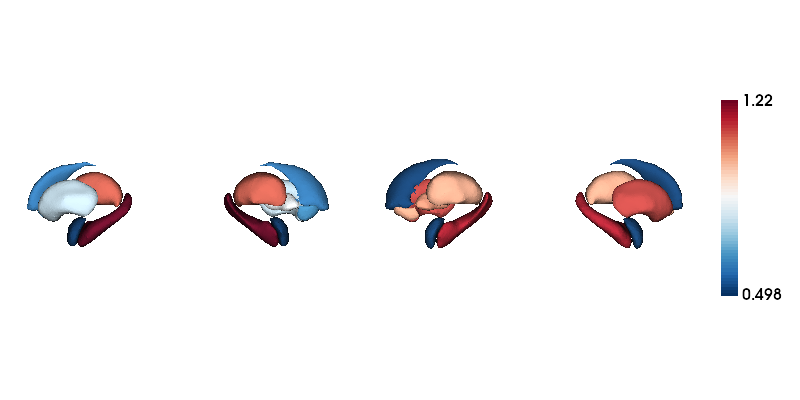

In [59]:
# Project the results on the surface brain
plot_subcortical(array_name=enigma_SC_input, size=(800, 400),
                 cmap='RdBu_r', color_bar=True, 
                #  color_range=(-3, 3), 
              #   color_range=(-1.15, 1.15),
                embed_nb=True)

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


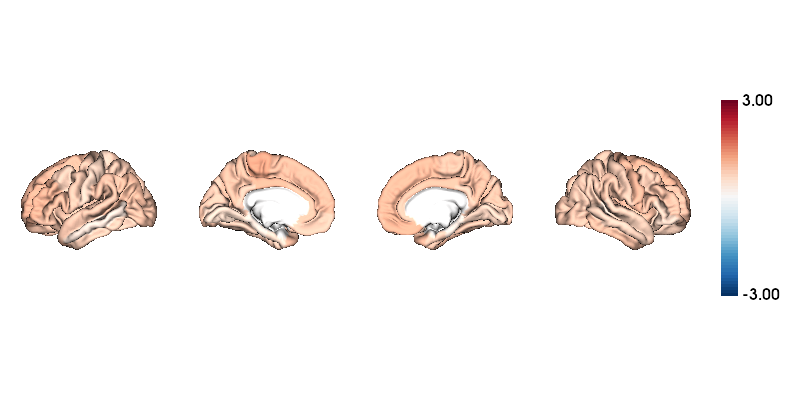

In [60]:
# Project the results on the surface brain
fig = plot_cortical(array_name=CT_z_mean_fsa5, surface_name="fsa5", size=(800, 400),
              cmap='RdBu_r', color_bar=True, 
              color_range=(-3,3),
              embed_nb=True)
fig

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


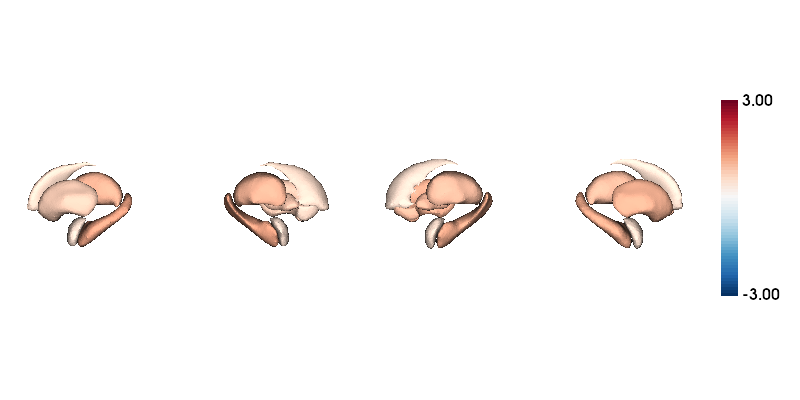

In [61]:
# Project the results on the surface brain
plot_subcortical(array_name=enigma_SC_input, size=(800, 400),
                 cmap='RdBu_r', color_bar=True, 
                 color_range=(-3, 3), 
              #   color_range=(-1.15, 1.15),
                embed_nb=True)

# Individual Baseline VS Blocked ROI Z-Score

In [283]:
print(df.index)

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
           dtype='int64')


PS11 baselinebrain
memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


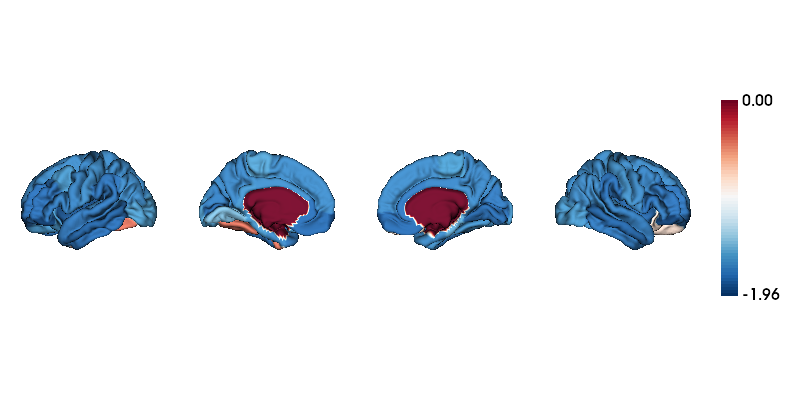

In [285]:
indx = 0
print(df['sub'].iloc[indx], df['ses'].iloc[indx])
enigma_CT_input = roi_z_score.iloc[indx][cortical_regions]
enigma_SC_input = roi_z_score.iloc[indx][subcortical_regions]

# Before visualizing the data, we need to map the parcellated data to the surface
CT_z_mean_fsa5 = parcel_to_surface(enigma_CT_input, 'aparc_fsa5')

# Project the results on the surface brain
fig = plot_cortical(array_name=CT_z_mean_fsa5, surface_name="fsa5", size=(800, 400),
              cmap='RdBu_r', color_bar=True, 
              # color_range=(-3,3),
              embed_nb=True)
fig

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


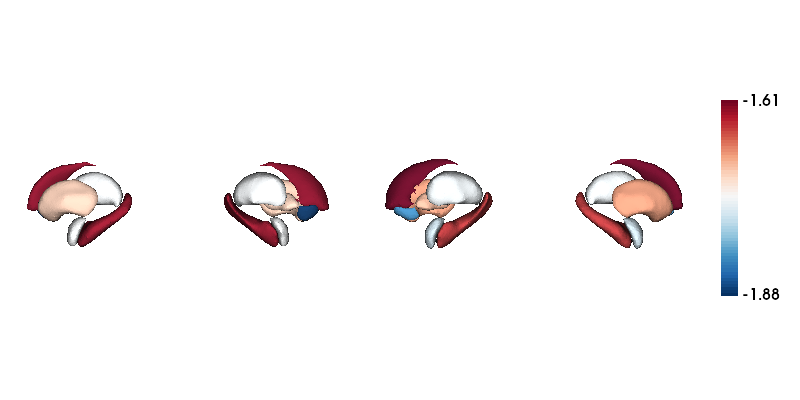

In [286]:
# Project the results on the surface brain
plot_subcortical(array_name=enigma_SC_input, size=(800, 400),
                 cmap='RdBu_r', color_bar=True, 
                #  color_range=(-3, 3), 
              #   color_range=(-1.15, 1.15),
                embed_nb=True)

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


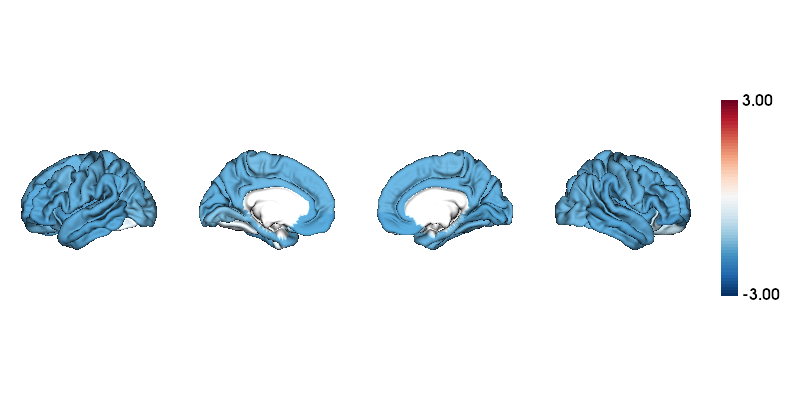

In [287]:
# Project the results on the surface brain
fig = plot_cortical(array_name=CT_z_mean_fsa5, surface_name="fsa5", size=(800, 400),
              cmap='RdBu_r', color_bar=True, 
              color_range=(-3,3),
              embed_nb=True)
fig

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


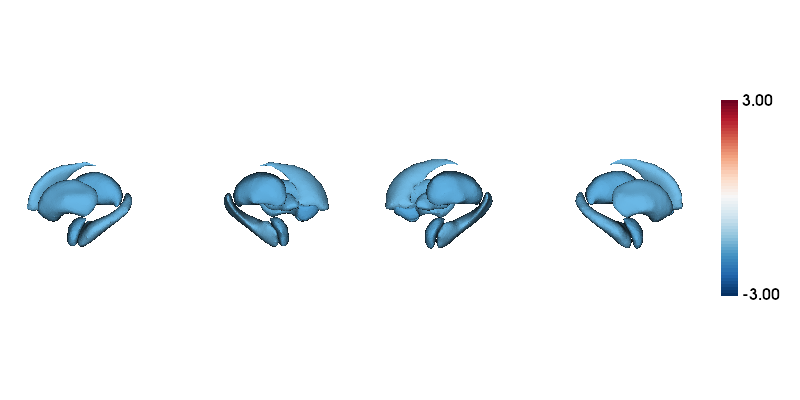

In [288]:
# Project the results on the surface brain
plot_subcortical(array_name=enigma_SC_input, size=(800, 400),
                 cmap='RdBu_r', color_bar=True, 
                 color_range=(-3, 3), 
              #   color_range=(-1.15, 1.15),
                embed_nb=True)

# Individual Baseline VS Blocked Subj Z-Score

PSBB07 blockedbrain
memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


/Users/ianliu/OtherCodingProjects/ENIGMA/enigmatoolbox/plotting/base.py:294: UserWarning: Support for interactive mode is only provided for a single renderer: 'nrow=1' and 'ncol=1'. Setting 'interactive=False'
  warnings.warn("Support for interactive mode is only provided for "


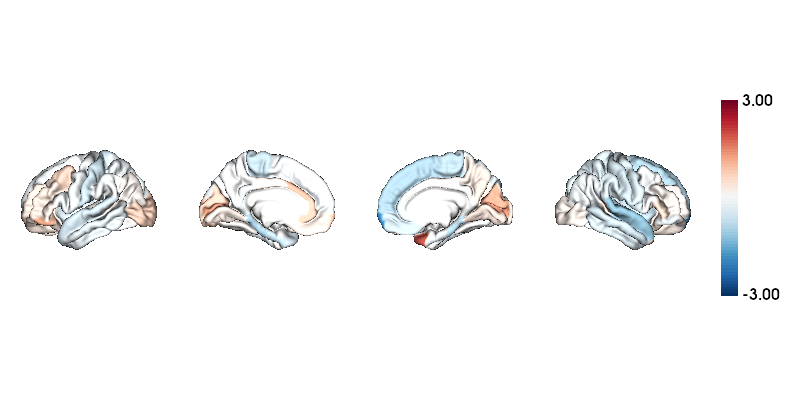

In [326]:
indx = 28
print(df['sub'].iloc[indx], df['ses'].iloc[indx])
enigma_CT_input = subj_z_score.iloc[indx][cortical_regions]
enigma_SC_input = subj_z_score.iloc[indx][subcortical_regions]
CT_z_mean_fsa5 = parcel_to_surface(enigma_CT_input, 'aparc_fsa5')

# Project the results on the surface brain
fig = plot_cortical(array_name=CT_z_mean_fsa5, surface_name="fsa5", size=(800, 400),
              cmap='RdBu_r', color_bar=True, 
              color_range=(-3,3),
              embed_nb=True)
fig

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


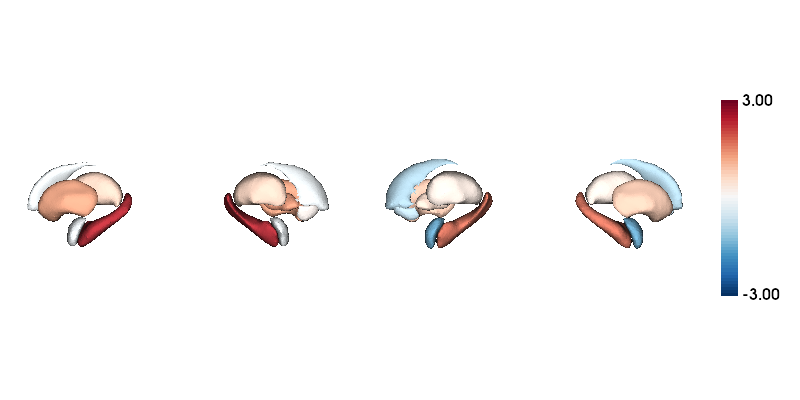

In [327]:
# Project the results on the surface brain
plot_subcortical(array_name=enigma_SC_input, size=(800, 400),
                 cmap='RdBu_r', color_bar=True, 
                 color_range=(-3, 3), 
              #   color_range=(-1.15, 1.15),
                embed_nb=True)

In [ ]:
# Before visualizing the data, we need to map the parcellated data to the surface
CT_z_mean_fsa5 = parcel_to_surface(enigma_CT_input, 'aparc_fsa5')

# Project the results on the surface brain
fig = plot_cortical(array_name=CT_z_mean_fsa5, surface_name="fsa5", size=(800, 400),
              cmap='RdBu_r', color_bar=True, 
              # color_range=(-3,3),
              embed_nb=True)
fig

In [ ]:
# Project the results on the surface brain
plot_subcortical(array_name=enigma_SC_input, size=(800, 400),
                 cmap='RdBu_r', color_bar=True, 
                #  color_range=(-3, 3), 
              #   color_range=(-1.15, 1.15),
                embed_nb=True)

# PTGS1

In [129]:
ptgs1df_zscore.mean(axis =1)

GDA             1.728220
SCN3A           0.698106
LOC650157      -0.869877
SCN3B           1.116534
RP4-737E23.4   -1.512057
                  ...   
C19orf68       -0.689304
C19orf67       -1.394302
C19orf66        0.826059
CCDC144NL       0.482328
LOC100129214   -1.309830
Length: 20736, dtype: float64

In [131]:
import pandas as pd 
ptgs1df = pd.read_csv('/Users/ianliu/Medical Research/Data/AHBA/AllenHBA_DK_ExpressionMatrix.tsv',
                 index_col=0, sep='\t')
ptgs1df_zscore = (ptgs1df - ptgs1df.mean(axis = 0))/ ptgs1df.std(axis = 0)

ptgs1df_gene_mean = ptgs1df.mean(axis=1)
ptgs1df_gene_std = ptgs1df.std(axis=1)
ptgs1df_gene_zscore = pd.DataFrame()
for i in range(ptgs1df.shape[0]):
    temp = (ptgs1df.iloc[i] - ptgs1df_gene_mean.iloc[i]) / ptgs1df_gene_std.iloc[i]
    ptgs1df_gene_zscore = ptgs1df_gene_zscore.append(temp)

ptgs1df_gene_zscore_mean = ptgs1df_zscore.mean(axis=1)
ptgs1df_gene_zscore_std = ptgs1df_zscore.std(axis=1)
ptgs1df_double_zscore = pd.DataFrame()

for i in range(ptgs1df_zscore.shape[0]):
    temp = (ptgs1df_zscore.iloc[i] - ptgs1df_gene_zscore_mean.iloc[i]) / ptgs1df_gene_zscore_std.iloc[i]
    ptgs1df_double_zscore = ptgs1df_double_zscore.append(temp)

ptgs1df

Average donor correlation to median  ctx-rh-insula  \
GDA                                      0.849281      10.047224   
SCN3A                                    0.799587       7.277753   
LOC650157                                0.359246       2.728028   
SCN3B                                    0.882848       8.636983   
RP4-737E23.4                             0.230524       1.506856   
...                                           ...            ...   
C19orf68                                 0.316182       3.680443   
C19orf67                                 0.270518       2.107279   
C19orf66                                 0.449209       7.448443   
CCDC144NL                                0.411609       6.658335   
LOC100129214                             0.416054       1.905710   

              ctx-lh-paracentral  ctx-rh-precuneus  \
GDA                     9.803793          9.913798   
SCN3A                   6.923297          7.161581   
LOC650157               3.863940          2.949788   
SCN3B                   7.780990          8.114519   
RP4-737E23.4            1.365718          1.699915   
...                          ...               ...   
C19orf68                3.544529          3.438731   
C19orf67                1.446142          1.951453   
C19orf66                7.568829          7.414281   
CCDC144NL               6.617677          6.522134   
LOC100129214            2.034552          2.105286   

              ctx-lh-medialorbitofrontal  ctx-rh-inferiortemporal  \
GDA                            10.111729                 9.962504   
SCN3A                           7.339751                 7.232630   
LOC650157                       3.109425                 3.126683   
SCN3B                           8.438042                 8.672639   
RP4-737E23.4                    1.338852                 1.583983   
...                                  ...                      ...   
C19orf68                        3.599496                 3.750842   
C19orf67                        1.592612                 1.909199   
C19orf66                        7.583147                 7.396814   
CCDC144NL                       6.622525                 6.506872   
LOC100129214                    1.686251                 2.047506   

              ctx-rh-medialorbitofrontal  ctx-rh-precentral  \
GDA                            10.001396           9.584618   
SCN3A                           7.314189           6.676053   
LOC650157                       2.925067           2.704961   
SCN3B                           8.660375           7.799257   
RP4-737E23.4                    1.531501           1.499822   
...                                  ...                ...   
C19orf68                        3.649375           3.579422   
C19orf67                        1.959853           1.953422   
C19orf66                        7.445893           7.554353   
CCDC144NL                       6.606672           6.458189   
LOC100129214                    1.779589           1.902539   

              ctx-rh-lateralorbitofrontal  ctx-rh-parahippocampal  ...  \
GDA                              9.797271               10.192952  ...   
SCN3A                            7.215931                7.311865  ...   
LOC650157                        2.762087                2.835933  ...   
SCN3B                            8.443789                8.729312  ...   
RP4-737E23.4                     1.487387                1.568481  ...   
...                                   ...                     ...  ...   
C19orf68                         3.588431                3.974205  ...   
C19orf67                         1.757514                2.048245  ...   
C19orf66                         7.410166                7.489515  ...   
CCDC144NL                        6.574164                6.426222  ...   
LOC100129214                     1.761115                2.264796  ...   

              ctx-lh-caudalanteriorcingulate  ctx-lh-lateraloccipital  \


In [132]:
ptgs1df_zscore_renamed = ptgs1df_zscore.drop(columns=['Average donor correlation to median']).copy()
for i in ptgs1df_zscore_renamed.columns:
    if i.replace('-','_') in petsurfer_enigma_mapping.keys():
        ptgs1df_zscore_renamed.rename(columns={i: petsurfer_enigma_mapping[i.replace('-','_')]}, inplace=True)

ptgs1df_gene_zscore_renamed = ptgs1df_gene_zscore.drop(columns=['Average donor correlation to median']).copy()
for i in ptgs1df_gene_zscore_renamed.columns:
    if i.replace('-','_') in petsurfer_enigma_mapping.keys():
        ptgs1df_gene_zscore_renamed.rename(columns={i: petsurfer_enigma_mapping[i.replace('-','_')]}, inplace=True)
        
ptgs1df_double_zscore_renamed = ptgs1df_double_zscore.drop(columns=['Average donor correlation to median']).copy()
for i in ptgs1df_double_zscore_renamed.columns:
    if i.replace('-','_') in petsurfer_enigma_mapping.keys():
        ptgs1df_double_zscore_renamed.rename(columns={i: petsurfer_enigma_mapping[i.replace('-','_')]}, inplace=True)

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


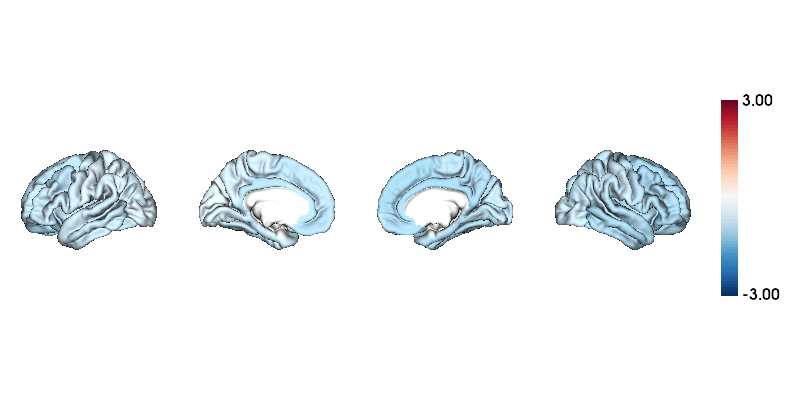

In [137]:
ptgs1_cortical = ptgs1df_zscore_renamed.loc['PTGS1'][cortical_regions]
# Before visualizing the data, we need to map the parcellated data to the surface
CT_z_mean_fsa5 = parcel_to_surface(ptgs1_cortical, 'aparc_fsa5')

# Project the results on the surface brain
fig = plot_cortical(array_name=CT_z_mean_fsa5, surface_name="fsa5", size=(800, 400),
              cmap='RdBu_r', color_bar=True, 
              color_range=(-3,3),
              embed_nb=True)
fig

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


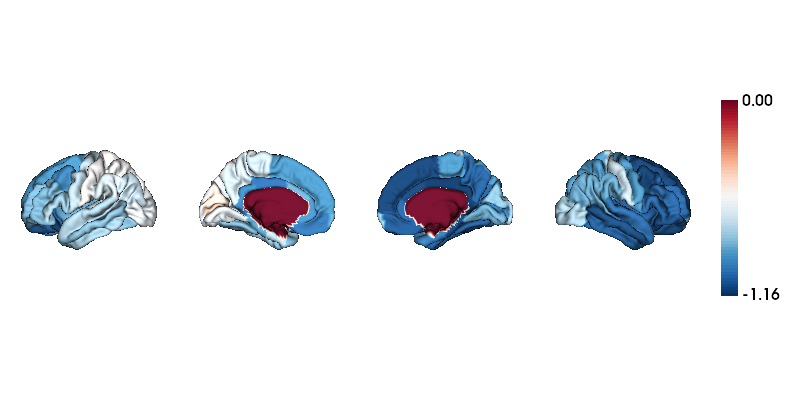

In [138]:
fig = plot_cortical(array_name=CT_z_mean_fsa5, surface_name="fsa5", size=(800, 400),
              cmap='RdBu_r', color_bar=True, 
              embed_nb=True)
fig

In [139]:
# ptgs1_cortical.to_csv("/Users/ianliu/Downloads/ptgs1_cortical_zscore.csv")

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


/Users/ianliu/OtherCodingProjects/ENIGMA/enigmatoolbox/plotting/base.py:294: UserWarning: Support for interactive mode is only provided for a single renderer: 'nrow=1' and 'ncol=1'. Setting 'interactive=False'
  warnings.warn("Support for interactive mode is only provided for "


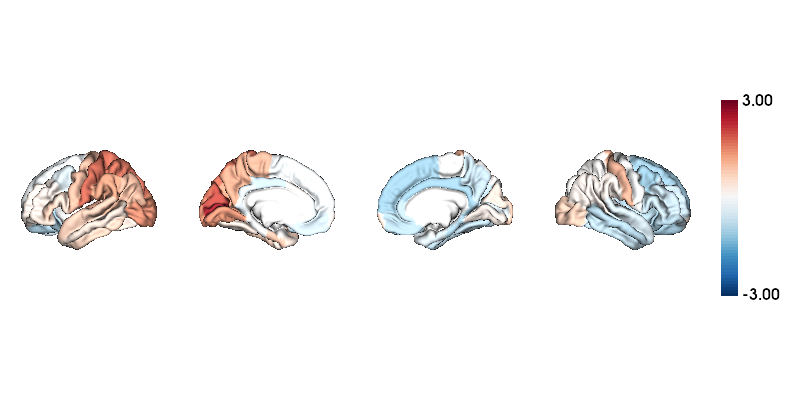

In [133]:
ptgs1_cortical = ptgs1df_gene_zscore_renamed.loc['PTGS1'][cortical_regions]
# Before visualizing the data, we need to map the parcellated data to the surface
CT_z_mean_fsa5 = parcel_to_surface(ptgs1_cortical, 'aparc_fsa5')

# Project the results on the surface brain
fig = plot_cortical(array_name=CT_z_mean_fsa5, surface_name="fsa5", size=(800, 400),
              cmap='RdBu_r', color_bar=True, 
              color_range=(-3,3),
              embed_nb=True)
fig

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


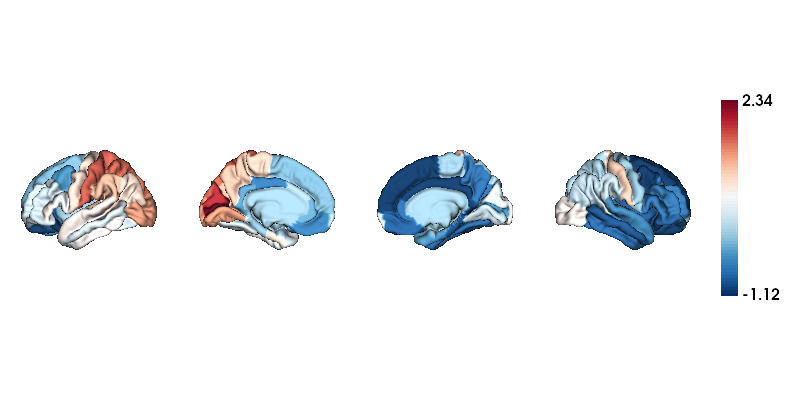

In [134]:
fig = plot_cortical(array_name=CT_z_mean_fsa5, surface_name="fsa5", size=(800, 400),
              cmap='RdBu_r', color_bar=True, 
              embed_nb=True)
fig

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


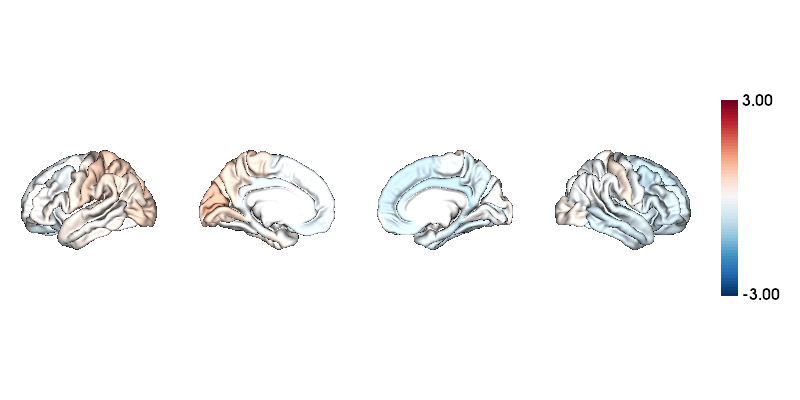

In [135]:
ptgs1_cortical = ptgs1df_double_zscore_renamed.loc['PTGS1'][cortical_regions]
# Before visualizing the data, we need to map the parcellated data to the surface
CT_z_mean_fsa5 = parcel_to_surface(ptgs1_cortical, 'aparc_fsa5')

# Project the results on the surface brain
fig = plot_cortical(array_name=CT_z_mean_fsa5, surface_name="fsa5", size=(800, 400),
              cmap='RdBu_r', color_bar=True, 
              color_range=(-3,3),
              embed_nb=True)
fig

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


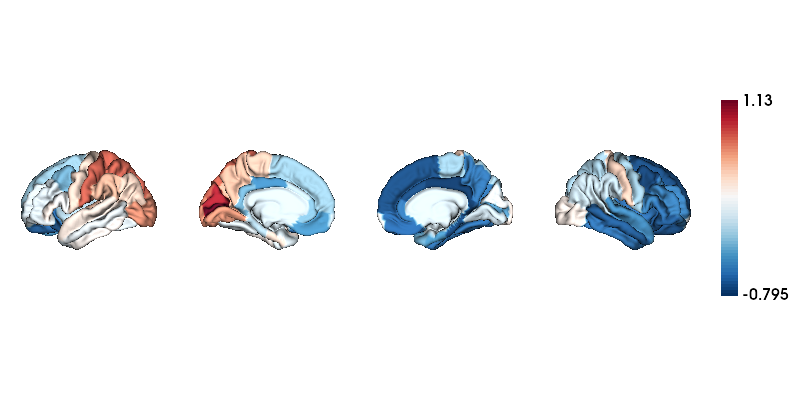

In [136]:
fig = plot_cortical(array_name=CT_z_mean_fsa5, surface_name="fsa5", size=(800, 400),
              cmap='RdBu_r', color_bar=True, 
              embed_nb=True)
fig

In [141]:
ptgs1df_zscore_renamed.loc['PTGS1']

R_insula                -1.078755
L_paracentral           -0.704390
R_precuneus             -1.067369
L_medialorbitofrontal   -1.016550
R_inferiortemporal      -1.074340
                           ...   
L_middletemporal        -0.825989
R_bankssts              -0.887982
L_caudalmiddlefrontal   -0.971479
L_temporalpole          -0.847991
R_paracentral           -0.927241
Name: PTGS1, Length: 68, dtype: float64

In [154]:
baseline_mean_subj_z_score = pd.read_csv('/Users/ianliu/Medical Research/Data/17-plus7/derivatives/baseline_mean_subj_z_score.csv', index_col=0)
blocked_mean_subj_z_score = pd.read_csv('/Users/ianliu/Medical Research/Data/17-plus7/derivatives/blocked_mean_subj_z_score.csv', index_col=0)
baseline_mean_subj_z_score.rename(columns={'0': 'Baseline-ZScore'}, inplace=True)
blocked_mean_subj_z_score.rename(columns={'0': 'Blocked-ZScore'}, inplace=True)
comparison_df = pd.merge(blocked_mean_subj_z_score, baseline_mean_subj_z_score, left_index=True, right_index=True, suffixes=('_blocked', '_baseline'))
comparison_df = comparison_df.merge(ptgs1df_zscore_renamed.loc['PTGS1'], left_index=True, right_index=True)
# comparison_df.drop(index=['LLatVent', 'RLatVent'], inplace=True)
comparison_df.rename(columns={'PTGS1': "PTGS1-ZScore"}, inplace=True)
comparison_df

Blocked-ZScore  Baseline-ZScore  PTGS1-ZScore
L_bankssts                      -0.859672         0.090194     -0.755147
L_caudalanteriorcingulate       -0.748468        -0.104284     -0.879002
L_caudalmiddlefrontal           -0.514477        -0.563986     -0.971479
L_cuneus                        -1.266907         1.658720     -0.505674
L_entorhinal                    -0.861770        -0.360252     -0.735104
...                                   ...              ...           ...
R_superiorparietal              -0.859736        -0.315118     -0.918419
R_superiortemporal              -0.828829        -0.682694     -1.032414
R_supramarginal                 -0.850148        -0.495644     -0.879025
R_temporalpole                  -0.356864        -0.744685     -0.973444
R_transversetemporal            -1.025637         0.441797     -0.984336

[68 rows x 3 columns]

In [156]:
from scipy import stats
stats.ttest_rel(comparison_df['Baseline-ZScore'], comparison_df['PTGS1-ZScore'])

TtestResult(statistic=10.211513696543674, pvalue=2.7279653995290734e-15, df=67)

In [157]:
stats.ttest_rel(comparison_df['Blocked-ZScore'], comparison_df['PTGS1-ZScore'])

TtestResult(statistic=1.0279765823743523, pvalue=0.3076577935914429, df=67)

In [158]:
from scipy.stats import spearmanr
spearmanr(comparison_df['Baseline-ZScore'][cortical_regions], comparison_df['PTGS1-ZScore'][cortical_regions])

SignificanceResult(statistic=0.3403061419246478, pvalue=0.0045185938732536166)

In [159]:
from scipy.stats import spearmanr
spearmanr(comparison_df['Blocked-ZScore'][cortical_regions], comparison_df['PTGS1-ZScore'][cortical_regions])

SignificanceResult(statistic=-0.3600793984043974, pvalue=0.002560391493091582)

In [160]:
comparison_df.to_csv('/Users/ianliu/Medical Research/Data/17-plus7/derivatives/comparison_ptgs1_zscore.csv')

<Axes: >

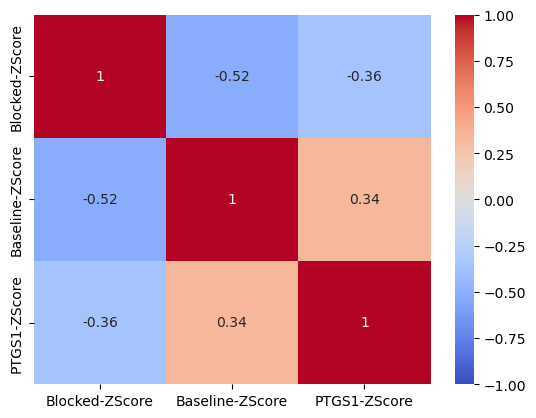

In [166]:
import seaborn as sns
mask = np.triu(comparison_df.corr("spearman"))
sns.heatmap(comparison_df.corr("spearman"), cmap='coolwarm', 
            annot=True, vmin=-1, vmax=1,
            xticklabels=True, yticklabels=True,
            # mask=mask
            ) 

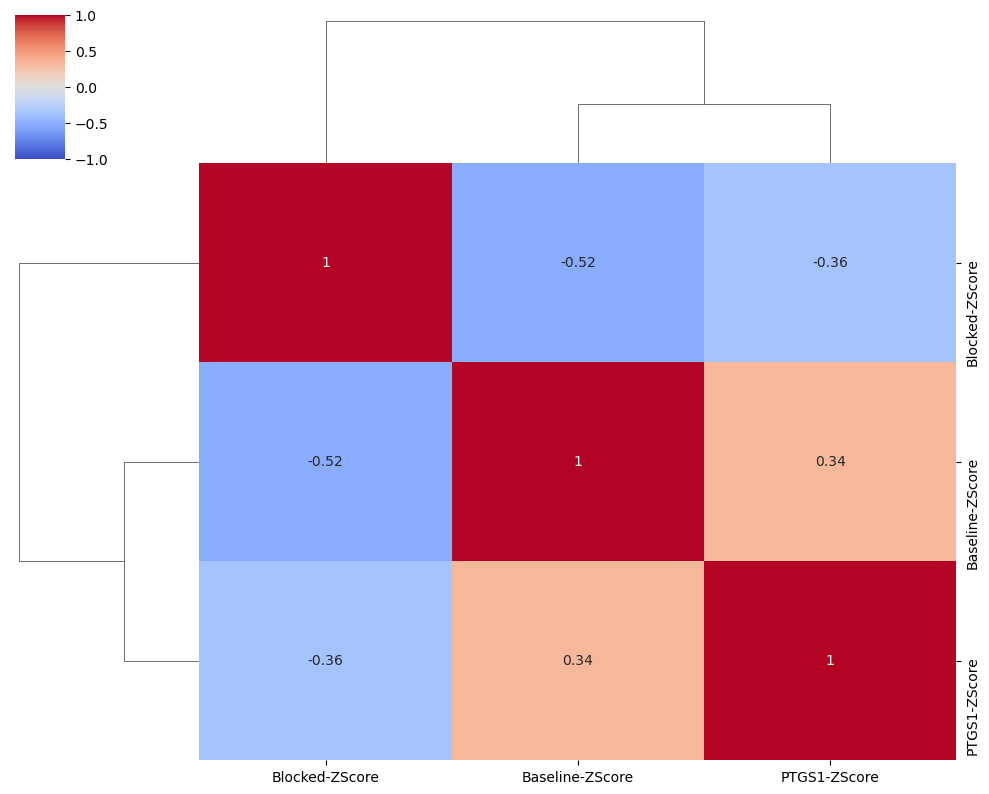

In [167]:
# Create a clustermap with hierarchical clustering and a dendrogram
sns.clustermap(
    comparison_df.corr("spearman"), 
    cmap="coolwarm", 
    annot=True, 
    vmin=-1, vmax=1, 
    metric="euclidean",  # Distance metric for clustering
    method="complete",   # Linkage method for clustering
    figsize=(10, 8)
)

<Axes: >

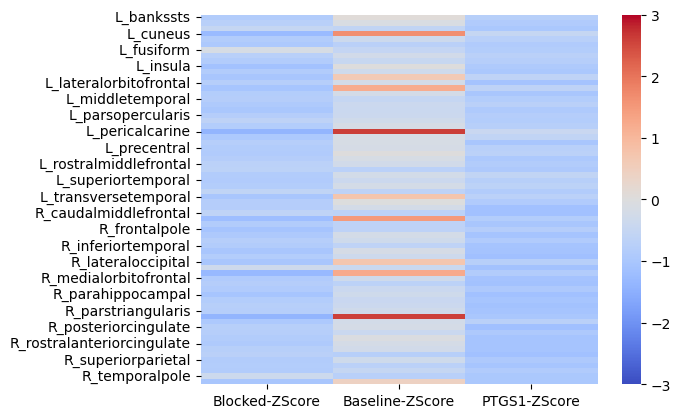

In [169]:
sns.heatmap(comparison_df,
            vmax=3, vmin=-3, cmap='coolwarm', annot=False,
            )

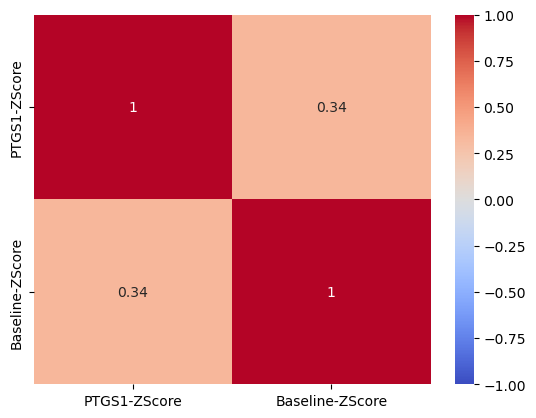

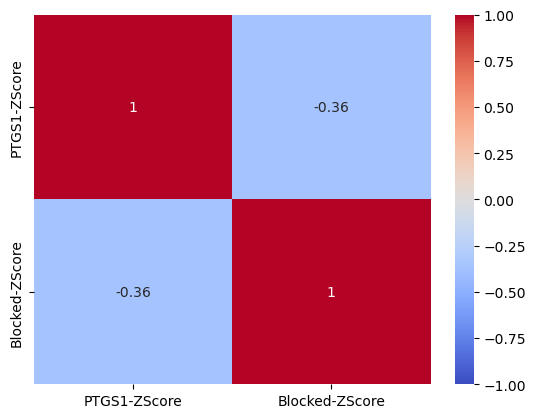

In [172]:
import matplotlib.pyplot as plt
sns.heatmap(comparison_df[['PTGS1-ZScore', 'Baseline-ZScore']].corr("spearman"),
            cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.show()
sns.heatmap(comparison_df[['PTGS1-ZScore', 'Blocked-ZScore']].corr("spearman"),
            cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.show()

# PTGS2

In [1]:


enigma_dk_mapping = pd.read_csv('/Users/ianliu/Medical Research/Data/Atlases/DK/desikanKilliany/enigma-dk-id.csv',
                                index_col=0)
petsurfer_enigma_mapping = dict(zip(enigma_dk_mapping['surfer-label-name'], enigma_dk_mapping['ENIGMA-label-name']))
lowercase_petsurfer_enigma_mapping = {k.lower(): v for k, v in petsurfer_enigma_mapping.items()}

df = pd.read_csv('/Users/ianliu/Medical Research/Data/Blood/derivatives/Vt_Values_Wide.csv',
                 index_col=0)
# df = pd.read_csv('/Users/ianliu/Medical Research/Data/17-plus7/derivatives/kinfitr/Vt_Values.csv',
#                  index_col=0)


roi_df = df.drop(columns=['sub',
                          'ses',
                          'task',
                          'trc',
                          'acq',
                          'run'])



# roi_means = roi_df.mean(axis=0)
# roi_std = roi_df.std(axis=0)
# roi_z_score = (roi_df - roi_means) / roi_std

subj_mean = roi_df.mean(axis=1)
subj_std = roi_df.std(axis=1)

grp = [0] * df.shape[0]

controlCode = 0
roi_z_score = zscore_matrix(roi_df, grp, controlCode)

# take subject z-score
# then take mean of z-scores for each ROI
subj_z_score = pd.DataFrame()
for i in range(roi_df.shape[0]):
    subj_z_score = subj_z_score.append((roi_df.iloc[i] - subj_mean.iloc[i]) / subj_std.iloc[i])
subj_z_score
# subj_z_score.mean(axis=0).to_csv('/Users/ianliu/Medical Research/Data/Blood/derivatives/Vt_Values_Subj_Z_Score_Mean.csv')
subj_z_score.mean(axis=0).to_csv('/Users/ianliu/Medical Research/Data/17-plus7/derivatives/Vt_Values_Subj_Z_Score_Mean.csv')

# take mean of values for each ROI
# Z-score each value by mean of ROI
# take average of Z-scores for each roi 
# roi_z_score.mean(axis=0).to_csv('/Users/ianliu/Medical Research/Data/Blood/derivatives/Vt_Values_ROI_Z_Score_Mean.csv')
roi_z_score.mean(axis=0).to_csv('/Users/ianliu/Medical Research/Data/17-plus7/derivatives/Vt_Values_ROI_Z_Score_Mean.csv')

# for i in roi_df.index:
#     subj_z_score = (roi_df.loc[i] - subj_mean.loc[i]) / subj_std.loc[i]
#     print(subj_z_score)
# subj_z_score

68 16


In [38]:
import pandas as pd 
from enigmatoolbox.utils.useful import zscore_matrix
from enigmatoolbox.utils.parcellation import parcel_to_surface
from enigmatoolbox.plotting import plot_cortical, plot_subcortical
import numpy as np

cortical_regions = ['L_bankssts', 'L_caudalanteriorcingulate', 
 'L_caudalmiddlefrontal', 'L_cuneus', 
 'L_entorhinal', 'L_fusiform', 
 'L_inferiorparietal', 'L_inferiortemporal', 
 'L_isthmuscingulate', 'L_lateraloccipital', 
 'L_lateralorbitofrontal', 'L_lingual', 
 'L_medialorbitofrontal', 'L_middletemporal', 
 'L_parahippocampal', 'L_paracentral', 
 'L_parsopercularis', 'L_parsorbitalis', 
 'L_parstriangularis', 'L_pericalcarine', 
 'L_postcentral', 'L_posteriorcingulate', 
 'L_precentral', 'L_precuneus', 
 'L_rostralanteriorcingulate', 
 'L_rostralmiddlefrontal', 'L_superiorfrontal', 
 'L_superiorparietal', 'L_superiortemporal', 
 'L_supramarginal', 'L_frontalpole', 
 'L_temporalpole', 'L_transversetemporal', 
 'L_insula', 
 'R_bankssts', 'R_caudalanteriorcingulate', 
 'R_caudalmiddlefrontal', 'R_cuneus', 
 'R_entorhinal', 'R_fusiform', 
 'R_inferiorparietal', 'R_inferiortemporal', 
 'R_isthmuscingulate', 'R_lateraloccipital', 
 'R_lateralorbitofrontal', 'R_lingual', 
 'R_medialorbitofrontal', 'R_middletemporal', 
 'R_parahippocampal', 'R_paracentral', 
 'R_parsopercularis', 'R_parsorbitalis', 
 'R_parstriangularis', 'R_pericalcarine',
 'R_postcentral', 'R_posteriorcingulate', 
 'R_precentral', 'R_precuneus',
 'R_rostralanteriorcingulate', 'R_rostralmiddlefrontal',
 'R_superiorfrontal', 'R_superiorparietal',
 'R_superiortemporal', 'R_supramarginal',
 'R_frontalpole', 'R_temporalpole',
 'R_transversetemporal', 'R_insula']
subcortical_regions = ['Laccumb', 'Lamyg', 'Lcaud', 'Lhippo', 'Lpal', 'Lput', 'Lthal',
       'LLatVent', 'Raccumb', 'Ramyg', 'Rcaud', 'Rhippo', 'Rpal', 'Rput',
       'Rthal', 'RLatVent']
print(len(cortical_regions), len(subcortical_regions))


PTGS2_df = pd.read_csv('/Users/ianliu/Medical Research/Data/atlas-DK_PTGS2.csv',
                       index_col=0, usecols=['Region', 'PTGS2', 'PTGS2-Zscore'])
# add new row
PTGS2_df.loc['LLatVent'] = np.nan
PTGS2_df.loc['RLatVent'] = np.nan

PTGS2_df = PTGS2_df.copy()
for i in PTGS2_df.index:
    # rename index
    if i in petsurfer_enigma_mapping.keys():
        PTGS2_df.rename(index={i: petsurfer_enigma_mapping[i]}, inplace=True)
        # print(i, petsurfer_enigma_mapping[i])
    elif i.lower() in lowercase_petsurfer_enigma_mapping.keys():
        PTGS2_df.rename(index={i: lowercase_petsurfer_enigma_mapping[i]}, inplace=True)
        # print(i, lowercase_petsurfer_enigma_mapping[i])
    else:
        PTGS2_df.rename(index={i: i.replace('-', '_')}, inplace=True)
        # print(i.replace('-', '_'))
        
PTGS2_df.rename(index={'aircavity': 'AirCavity',
                       'skull': 'Skull',
                       'csf_extracerebral':'CSF-ExtraCerebral',
                       'csf': 'CSF',
                       'pons': 'Pons',
                       'vermis': 'Vermis',
                       'brain-stem': 'Brain-Stem',
                       'right-amygdala': 'Ramyg',
                       'Left-Lateral-Ventricle': 'LLatVent',
                       'Right-Lateral-Ventricle': 'RLatVent',
                       "L_accumbensarea": "Laccumb",
                       "L_amygdala": "Lamyg",
                       'L_caudate': 'Lcaud', 
                       'L_hippocampus': 'Lhippo', 
                       'L_pallidum': 'Lpal', 
                       'L_putamen': 'Lput', 
                       'L_thalamusproper': 'Lthal', 
                       'R_accumbensarea': 'Raccumb', 
                       'R_amygdala': 'Ramyg', 
                       'R_caudate': 'Rcaud', 
                       'R_hippocampus': 'Rhippo', 
                       'R_pallidum': 'Rpal', 
                       'R_putamen': 'Rput', 
                       'R_thalamusproper': 'Rthal'
                   }, inplace=True)
# insert new row
PTGS2_df.loc['LLatVent'] = np.nan
PTGS2_df.loc['RLatVent'] = np.nan

ptgs2_z_cortical = PTGS2_df['PTGS2-Zscore'][cortical_regions].copy()
ptg2_z_subcortical = PTGS2_df['PTGS2-Zscore'][subcortical_regions].copy()
ptgs2_cortical = PTGS2_df['PTGS2'][cortical_regions].copy()
ptgs2_subcortical = PTGS2_df['PTGS2'][subcortical_regions].copy()
PTGS2_df

68 16


PTGS2  PTGS2-Zscore
Region                                           
L_bankssts                 0.559267      0.414017
L_caudalanteriorcingulate  0.307238     -1.332825
L_caudalmiddlefrontal      0.533703      0.236831
L_cuneus                   0.707167      1.439126
L_entorhinal               0.194430     -2.114706
...                             ...           ...
Rhippo                     0.267109     -1.610957
Ramyg                      0.926117      2.956698
brainstem                  0.316314     -1.269918
LLatVent                        NaN           NaN
RLatVent                        NaN           NaN

[85 rows x 2 columns]

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


/Users/ianliu/OtherCodingProjects/ENIGMA/enigmatoolbox/plotting/base.py:294: UserWarning: Support for interactive mode is only provided for a single renderer: 'nrow=1' and 'ncol=1'. Setting 'interactive=False'
  warnings.warn("Support for interactive mode is only provided for "


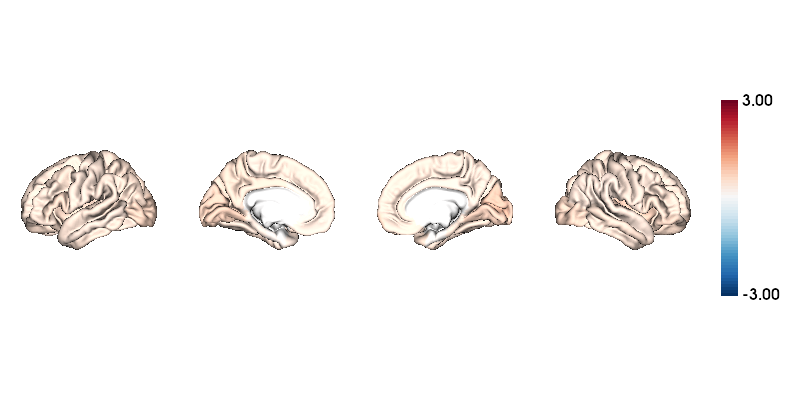

In [39]:
# Before visualizing the data, we need to map the parcellated data to the surface
CT_z_mean_fsa5 = parcel_to_surface(ptgs2_cortical, 'aparc_fsa5')

# Project the results on the surface brain
fig = plot_cortical(array_name=CT_z_mean_fsa5, surface_name="fsa5", size=(800, 400),
              cmap='RdBu_r', color_bar=True, 
              color_range=(-3,3),
              embed_nb=True)
fig

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


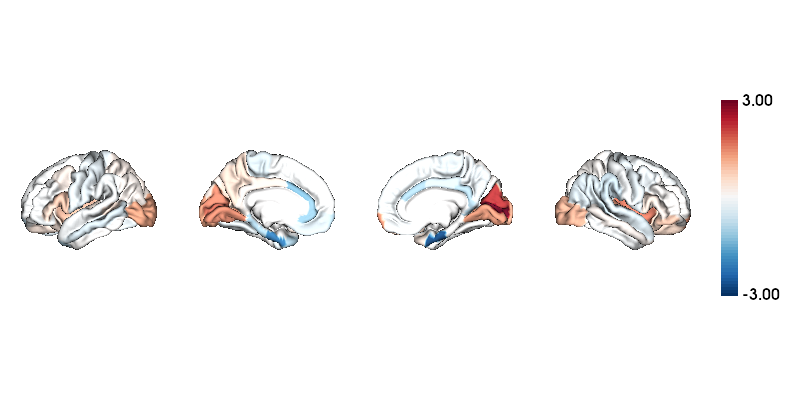

In [40]:
# Before visualizing the data, we need to map the parcellated data to the surface
CT_z_mean_fsa5 = parcel_to_surface(ptgs2_z_cortical, 'aparc_fsa5')

# Project the results on the surface brain
fig = plot_cortical(array_name=CT_z_mean_fsa5, surface_name="fsa5", size=(800, 400),
              cmap='RdBu_r', color_bar=True, 
              color_range=(-3,3),
              embed_nb=True)
fig

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


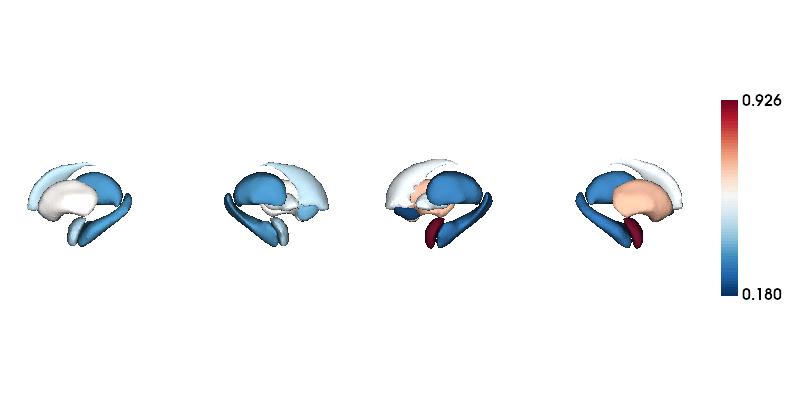

In [41]:
# Project the results on the surface brain
plot_subcortical(array_name=ptgs2_subcortical, size=(800, 400),
                 cmap='RdBu_r', color_bar=True, 
                embed_nb=True)

memoryview: a bytes-like object is required, not 'BSVTKObjectWrapper'


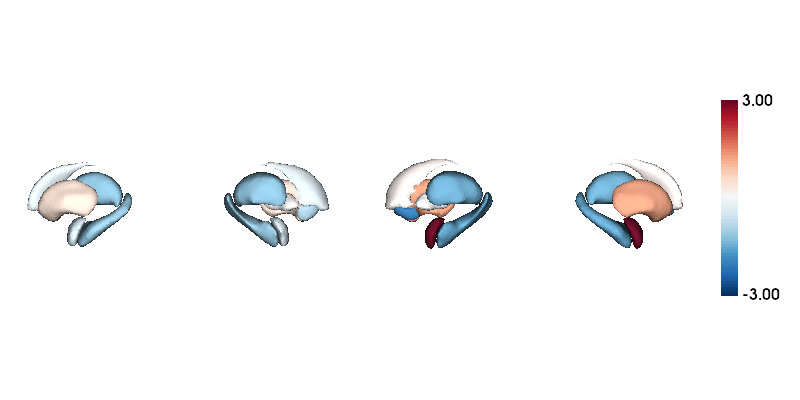

In [42]:
# Project the results on the surface brain
plot_subcortical(array_name=ptg2_z_subcortical, size=(800, 400),
                 cmap='RdBu_r', color_bar=True, 
                 color_range=(-3, 3), 
                embed_nb=True)

In [179]:
PTGS2_df['PTGS2-Zscore'][cortical_regions]

Region
L_bankssts                   0.414017
L_caudalanteriorcingulate   -1.332825
L_caudalmiddlefrontal        0.236831
L_cuneus                     1.439126
L_entorhinal                -2.114706
                               ...   
R_supramarginal             -0.617290
R_frontalpole                1.371799
R_temporalpole               0.321309
R_transversetemporal         1.324973
R_insula                     1.584051
Name: PTGS2-Zscore, Length: 68, dtype: float64

In [51]:
subcortical_regions_new = ['Laccumb',
 'Lamyg',
 'Lcaud',
 'Lhippo',
 'Lpal',
 'Lput',
 'Lthal',
 'Raccumb',
 'Ramyg',
 'Rcaud',
 'Rhippo',
 'Rpal',
 'Rput',
 'Rthal']

baseline_mean_subj_z_score = pd.read_csv('/Users/ianliu/Medical Research/Data/17-plus7/derivatives/baseline_mean_subj_z_score.csv', index_col=0)
blocked_mean_subj_z_score = pd.read_csv('/Users/ianliu/Medical Research/Data/17-plus7/derivatives/blocked_mean_subj_z_score.csv', index_col=0)
baseline_mean_subj_z_score.rename(columns={'0': 'Baseline-ZScore'}, inplace=True)
blocked_mean_subj_z_score.rename(columns={'0': 'Blocked-ZScore'}, inplace=True)
comparison_df = pd.merge(blocked_mean_subj_z_score, baseline_mean_subj_z_score, left_index=True, right_index=True, suffixes=('_blocked', '_baseline'))
comparison_df = comparison_df.merge(PTGS2_df[['PTGS2-Zscore']], left_index=True, right_index=True)
comparison_df.drop(index=['LLatVent', 'RLatVent'], inplace=True)
comparison_df = comparison_df[["PTGS2-Zscore", "Baseline-ZScore", "Blocked-ZScore"]]
comparison_df

PTGS2-Zscore  Baseline-ZScore  Blocked-ZScore
L_bankssts                     0.414017         0.090194       -0.859672
L_caudalanteriorcingulate     -1.332825        -0.104284       -0.748468
L_caudalmiddlefrontal          0.236831        -0.563986       -0.514477
L_cuneus                       1.439126         1.658720       -1.266907
L_entorhinal                  -2.114706        -0.360252       -0.861770
...                                 ...              ...             ...
Rcaud                          0.133029        -0.982102       -0.630490
Rhippo                        -1.610957         2.547775       -1.393005
Rpal                           0.012265         0.849753       -0.861359
Rput                           1.218825         0.442029       -0.725762
Rthal                         -1.505145         0.932219       -0.926565

[82 rows x 3 columns]

In [63]:
from scipy import stats
stats.ttest_rel(comparison_df['Baseline-ZScore'], comparison_df['PTGS2-Zscore'])

TtestResult(statistic=0.012397714527432473, pvalue=0.9901387935798805, df=81)

In [64]:
from scipy import stats
stats.ttest_rel(comparison_df['Blocked-ZScore'], comparison_df['PTGS2-Zscore'])

TtestResult(statistic=-7.451838696696885, pvalue=8.93913387281843e-11, df=81)

In [52]:
from scipy.stats import spearmanr
spearmanr(comparison_df['Baseline-ZScore'][cortical_regions], comparison_df['PTGS2-Zscore'][cortical_regions])

SignificanceResult(statistic=0.4381417719586212, pvalue=0.00018635688011240428)

In [53]:
spearmanr(comparison_df['Blocked-ZScore'][cortical_regions], comparison_df['PTGS2-Zscore'][cortical_regions])

SignificanceResult(statistic=-0.3663396572126579, pvalue=0.002122876509035353)

In [54]:
spearmanr(comparison_df['Baseline-ZScore'][subcortical_regions_new], comparison_df['PTGS2-Zscore'][subcortical_regions_new])

SignificanceResult(statistic=-0.3142857142857143, pvalue=0.27380490296286775)

In [55]:
spearmanr(comparison_df['Blocked-ZScore'][subcortical_regions_new], comparison_df['PTGS2-Zscore'][subcortical_regions_new])

SignificanceResult(statistic=0.5076923076923077, pvalue=0.06383915813376861)

In [56]:
comparison_df.to_csv('/Users/ianliu/Medical Research/Data/17-plus7/derivatives/comparison_zscore.csv')

<Axes: >

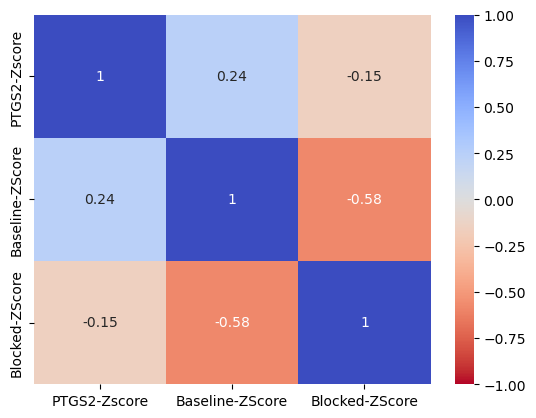

In [437]:
import seaborn as sns
mask = np.triu(comparison_df.corr("spearman"))
sns.heatmap(comparison_df.corr("spearman"), cmap='coolwarm_r', 
            annot=True, vmin=-1, vmax=1,
            xticklabels=True, yticklabels=True,
            # mask=mask
            ) 

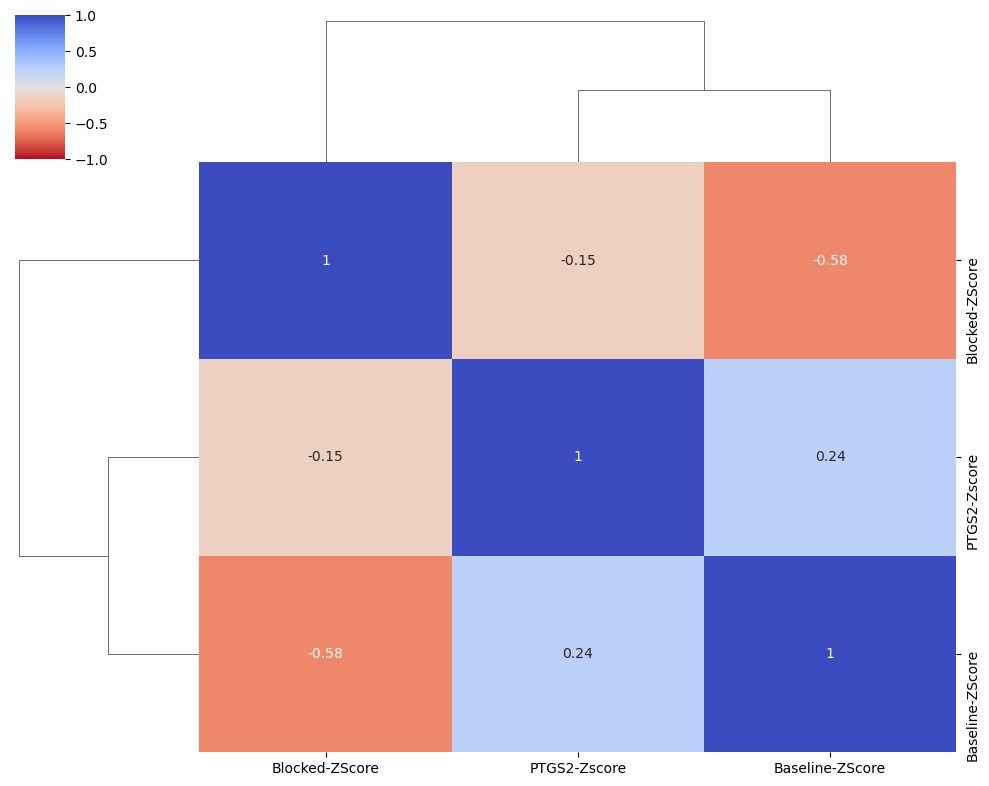

In [438]:
# Create a clustermap with hierarchical clustering and a dendrogram
sns.clustermap(
    comparison_df.corr("spearman"), 
    cmap="coolwarm_r", 
    annot=True, 
    vmin=-1, vmax=1, 
    metric="euclidean",  # Distance metric for clustering
    method="complete",   # Linkage method for clustering
    figsize=(10, 8)
)

# # Create a clustermap with hierarchical clustering and a dendrogram
# sns.clustermap(
#     comparison_df.corr("spearman"), 
#     cmap="coolwarm_r", 
#     annot=True, 
#     vmin=-1, vmax=1, 
#     metric="euclidean",  # Distance metric for clustering
#     method="single",   # Linkage method for clustering
#     # figsize=(10, 8)
# )

# # Create a clustermap with hierarchical clustering and a dendrogram
# sns.clustermap(
#     comparison_df.corr("spearman"), 
#     cmap="coolwarm_r", 
#     annot=True, 
#     vmin=-1, vmax=1, 
#     metric="euclidean",  # Distance metric for clustering
#     method="average",   # Linkage method for clustering
#     # figsize=(10, 8)
# )

# # Create a clustermap with hierarchical clustering and a dendrogram
# sns.clustermap(
#     comparison_df.corr("spearman"), 
#     cmap="coolwarm_r", 
#     annot=True, 
#     vmin=-1, vmax=1, 
#     metric="euclidean",  # Distance metric for clustering
#     method="weighted",   # Linkage method for clustering
#     # figsize=(10, 8)
# )

# # Create a clustermap with hierarchical clustering and a dendrogram
# sns.clustermap(
#     comparison_df.corr("spearman"), 
#     cmap="coolwarm_r", 
#     annot=True, 
#     vmin=-1, vmax=1, 
#     metric="euclidean",  # Distance metric for clustering
#     method="centroid",   # Linkage method for clustering
#     # figsize=(10, 8)
# )

# # Create a clustermap with hierarchical clustering and a dendrogram
# sns.clustermap(
#     comparison_df.corr("spearman"), 
#     cmap="coolwarm_r", 
#     annot=True, 
#     vmin=-1, vmax=1, 
#     metric="euclidean",  # Distance metric for clustering
#     method="median",   # Linkage method for clustering
#     # figsize=(10, 8)
# )



<Axes: >

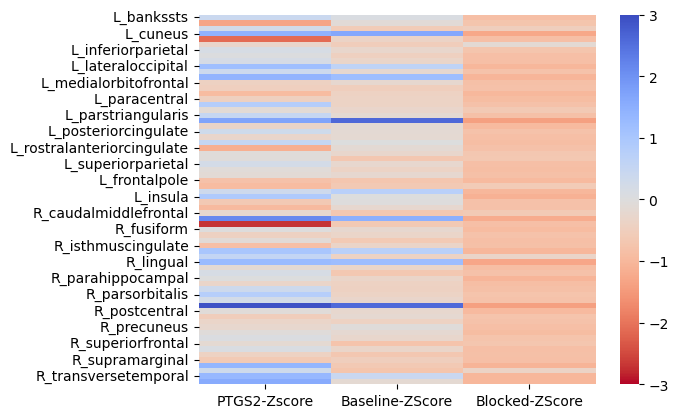

In [439]:
sns.heatmap(comparison_df.loc[cortical_regions],
            vmax=3, vmin=-3, cmap='coolwarm_r', annot=False,
            )

<Axes: >

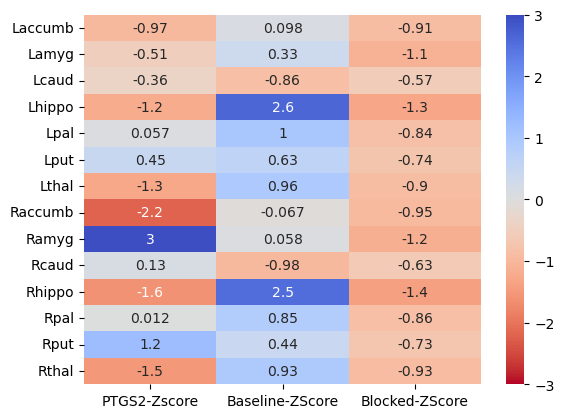

In [441]:
sns.heatmap(comparison_df.loc[subcortical_regions_new],
            vmax=3, vmin=-3, cmap='coolwarm_r', annot=True,
            )

In [329]:
ptgs2_filtered = pd.read_csv('/Users/ianliu/Medical Research/Data/17-plus7/derivatives/comparison_zscore_BacktoIan2.csv', index_col=0)
# remove rows with nan
ptgs2_filtered.dropna(inplace=True)
ptgs2_filtered

Blocked-ZScore  Baseline-ZScore  PTGS2-Zscore
L_caudalanteriorcingulate        0.439331        -0.104284     -1.332825
L_caudalmiddlefrontal            0.450387        -0.563986      0.236831
L_cuneus                         0.471226         1.658720      1.439126
L_frontalpole                   -0.919775        -0.708551     -0.811215
L_fusiform                      -0.274208        -0.534201     -0.290243
...                                   ...              ...           ...
Rcaud                           -0.572952        -0.982102      0.133029
Rhippo                           0.645175         2.547775     -1.610957
Rpal                             1.226254         0.849753      0.012265
Rput                             1.157381         0.442029      1.218825
Rthal                            0.988275         0.932219     -1.505145

[64 rows x 3 columns]

In [330]:
import seaborn as sns
ptgs2_filtered.corr("spearman")

Blocked-ZScore  Baseline-ZScore  PTGS2-Zscore
Blocked-ZScore         1.000000         0.638965      0.066621
Baseline-ZScore        0.638965         1.000000      0.185852
PTGS2-Zscore           0.066621         0.185852      1.000000

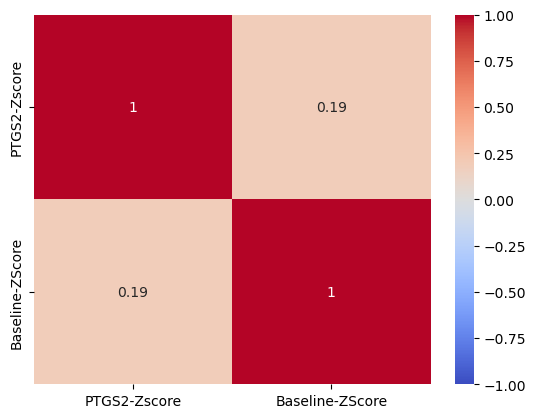

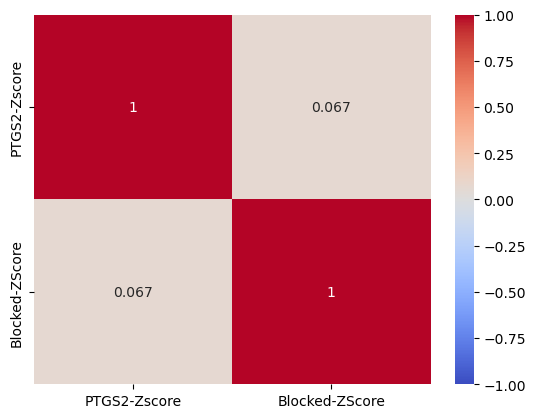

In [352]:
import matplotlib.pyplot as plt
sns.heatmap(ptgs2_filtered[['PTGS2-Zscore', 'Baseline-ZScore']].corr("spearman"),
            cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.show()
sns.heatmap(ptgs2_filtered[['PTGS2-Zscore', 'Blocked-ZScore']].corr("spearman"),
            cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.show()

In [337]:
spearmanr(ptgs2_filtered['Baseline-ZScore'], ptgs2_filtered['PTGS2-Zscore'])

SignificanceResult(statistic=0.18585164835164836, pvalue=0.14146612603539652)

In [336]:
spearmanr(ptgs2_filtered['Blocked-ZScore'], ptgs2_filtered['PTGS2-Zscore'])

SignificanceResult(statistic=0.06662087912087912, pvalue=0.6009433805584494)

In [339]:
len(comparison_df.index)

82

In [363]:
temp = pd.read_csv('/Users/ianliu/Medical Research/Data/atlas-DK_PTGS2_selectedROI.csv', index_col=0)
temp

Region     PTGS2  PTGS2-Zscore
label                                                   
1                     L_bankssts  0.559267      0.414017
2      L_caudalanteriorcingulate  0.307238     -1.332825
3          L_caudalmiddlefrontal  0.533703      0.236831
4                       L_cuneus  0.707167      1.439126
5                   L_entorhinal  0.194430     -2.114706
...                          ...       ...           ...
79                    R_pallidum  0.501303      0.012265
80               R_accumbensarea  0.180277     -2.212799
81                 R_hippocampus  0.267109     -1.610957
82                    R_amygdala  0.926117      2.956698
83                     brainstem  0.316314     -1.269918

[83 rows x 3 columns]

In [367]:
comparison_df

PTGS2-Zscore  Baseline-ZScore  Blocked-ZScore
L_bankssts                     0.414017         0.090194        0.343957
L_caudalanteriorcingulate     -1.332825        -0.104284        0.439331
L_caudalmiddlefrontal          0.236831        -0.563986        0.450387
L_cuneus                       1.439126         1.658720        0.471226
L_entorhinal                  -2.114706        -0.360252       -0.478377
...                                 ...              ...             ...
Rcaud                          0.133029        -0.982102       -0.572952
Rhippo                        -1.610957         2.547775        0.645175
Rpal                           0.012265         0.849753        1.226254
Rput                           1.218825         0.442029        1.157381
Rthal                         -1.505145         0.932219        0.988275

[82 rows x 3 columns]

In [366]:
temp

Region     PTGS2  PTGS2-Zscore
label                                                   
1                     L_bankssts  0.559267      0.414017
2      L_caudalanteriorcingulate  0.307238     -1.332825
3          L_caudalmiddlefrontal  0.533703      0.236831
4                       L_cuneus  0.707167      1.439126
5                   L_entorhinal  0.194430     -2.114706
...                          ...       ...           ...
79                    R_pallidum  0.501303      0.012265
80               R_accumbensarea  0.180277     -2.212799
81                 R_hippocampus  0.267109     -1.610957
82                    R_amygdala  0.926117      2.956698
83                     brainstem  0.316314     -1.269918

[83 rows x 3 columns]

In [364]:
temp['PTGS2'].corr(comparison_df['Baseline-ZScore'])

nan

In [448]:
best_corr = -1
for i in range(temp_df.shape[0]):
    temp_df = comparison_df.drop(comparison_df.index[i])
    corr = temp_df['Baseline-ZScore'].corr(temp_df['PTGS2-Zscore'], "spearman")
    if corr > best_corr:
        best_df = temp_df.copy()
        best_corr = corr
        print(best_corr)

0.22911020776874436
0.2576332429990966
0.2661020776874435
0.2836720867208672


In [362]:
best_df.index

Index(['L_bankssts', 'L_caudalanteriorcingulate', 'L_caudalmiddlefrontal',
       'L_cuneus', 'L_entorhinal', 'L_frontalpole', 'L_fusiform',
       'L_inferiorparietal', 'L_inferiortemporal', 'L_insula',
       'L_isthmuscingulate', 'L_lateraloccipital', 'L_lateralorbitofrontal',
       'L_lingual', 'L_medialorbitofrontal', 'L_middletemporal',
       'L_paracentral', 'L_parahippocampal', 'L_parsopercularis',
       'L_parsorbitalis', 'L_parstriangularis', 'L_pericalcarine',
       'L_postcentral', 'L_posteriorcingulate', 'L_precentral', 'L_precuneus',
       'L_rostralanteriorcingulate', 'L_rostralmiddlefrontal',
       'L_superiorfrontal', 'L_superiorparietal', 'L_superiortemporal',
       'L_supramarginal', 'L_temporalpole', 'L_transversetemporal',
       'R_bankssts', 'R_caudalanteriorcingulate', 'R_caudalmiddlefrontal',
       'R_cuneus', 'R_entorhinal', 'R_frontalpole', 'R_fusiform',
       'R_inferiorparietal', 'R_inferiortemporal', 'R_insula',
       'R_isthmuscingulate', 'R_lat

In [355]:
import pandas as pd

def maximize_correlation(df, target_col1='PTGS2-Zscore', target_col2='Baseline-ZScore', 
                         max_iterations=100, method='deletion'):
    """
    Iteratively deletes or adds rows to maximize the correlation between two columns.

    Args:
        df: pandas DataFrame containing the data.
        target_col1: Name of the first column.
        target_col2: Name of the second column.
        max_iterations: Maximum number of iterations.
        method: 'deletion' or 'addition' (if applicable).

    Returns:
        best_df: DataFrame with the highest correlation.
        best_corr: Highest correlation value.
    """

    if method not in ['deletion', 'addition']:
        raise ValueError("Invalid method. Choose 'deletion' or 'addition'.")

    best_df = df.copy()
    best_corr = df[target_col1].corr(df[target_col2])

    for _ in range(max_iterations):
        if method == 'deletion':
            for i in range(len(df)):
                temp_df = df.drop(i) 
                corr = temp_df[target_col1].corr(temp_df[target_col2])
                if corr > best_corr:
                    best_df = temp_df.copy()
                    best_corr = corr
        elif method == 'addition':
            pass
            # Implement logic for iterative addition (if applicable)

    return best_df, best_corr

# Example usage
# Assuming your DataFrame is named 'data'
best_df, best_corr = maximize_correlation(comparison_df, max_iterations=1000) 

print("Highest Correlation:", best_corr)
print("DataFrame with Highest Correlation:")
print(best_df)

KeyError: '[0] not found in axis'

In [344]:
comparison_df.index[0:]

Index(['L_bankssts'], dtype='object')

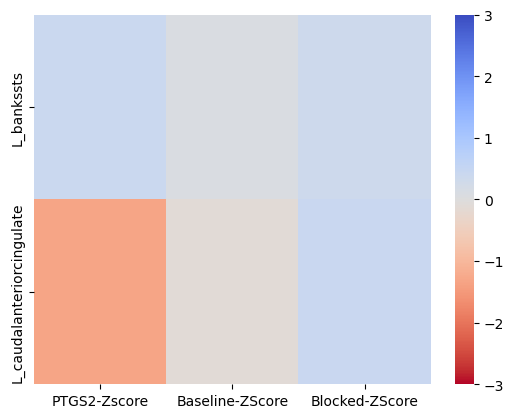

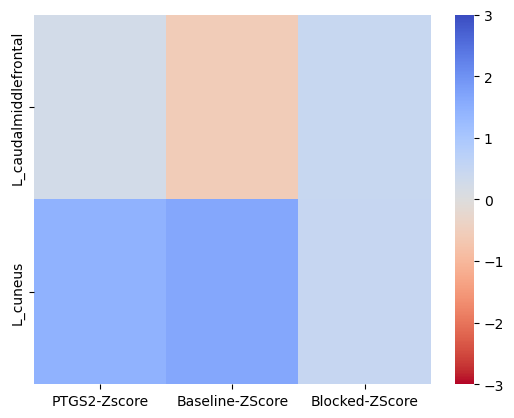

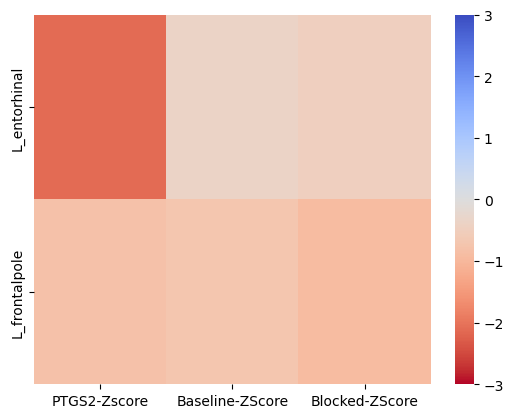

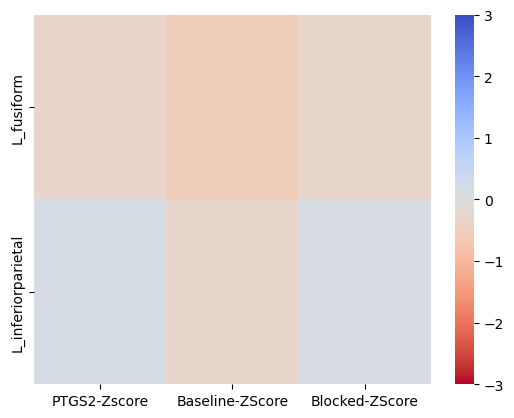

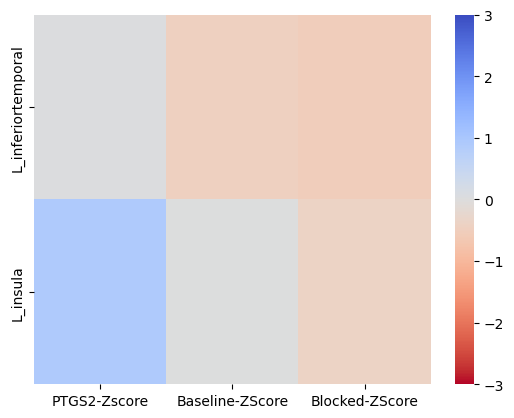

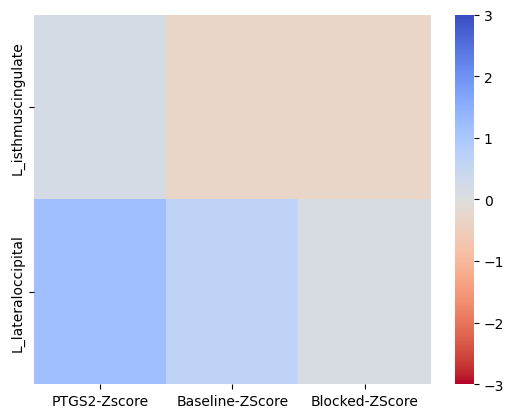

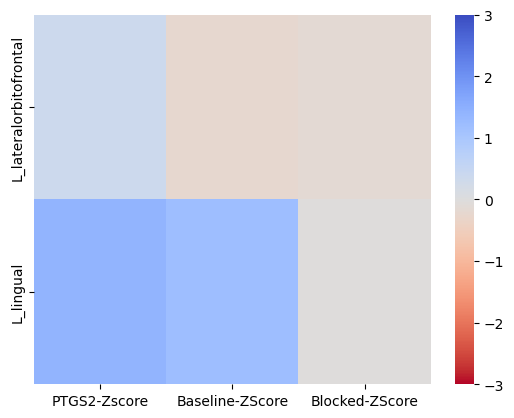

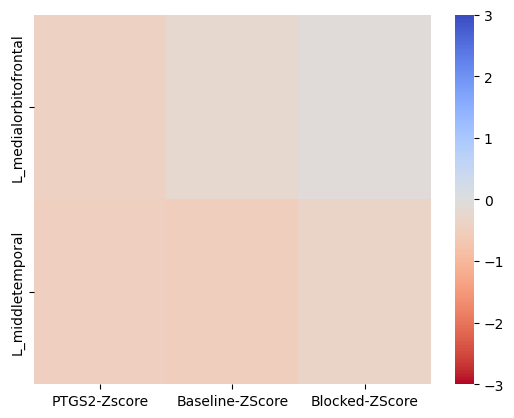

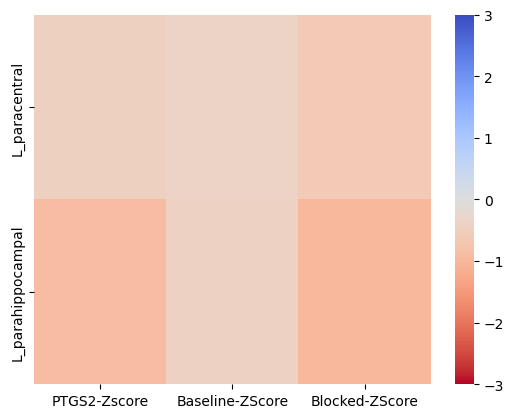

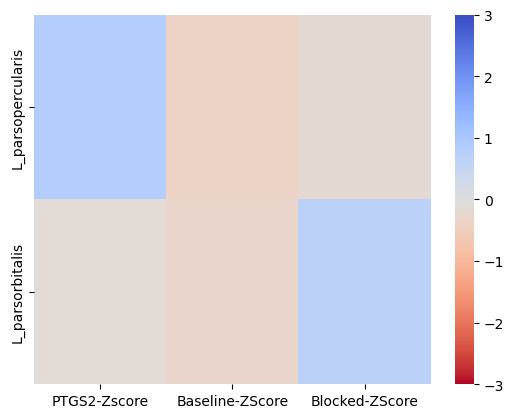

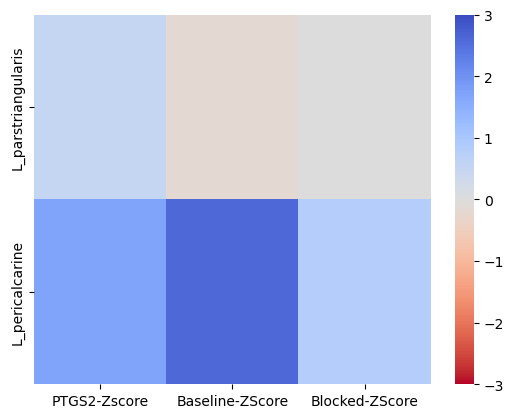

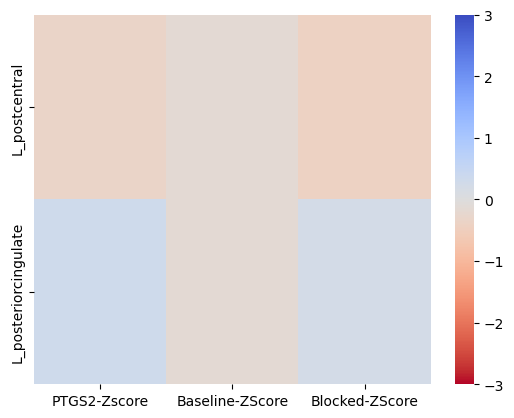

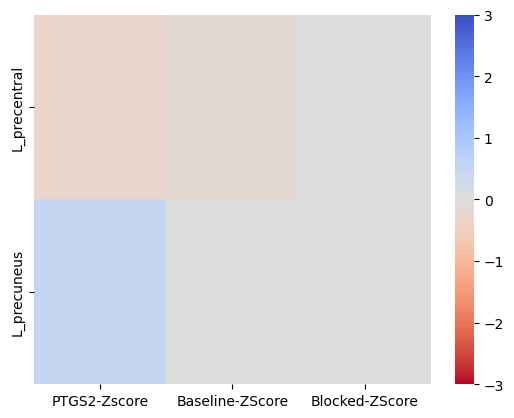

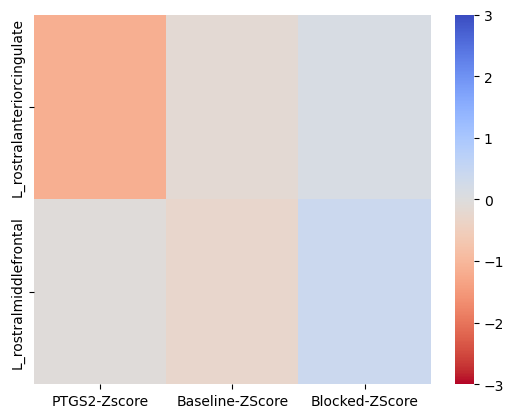

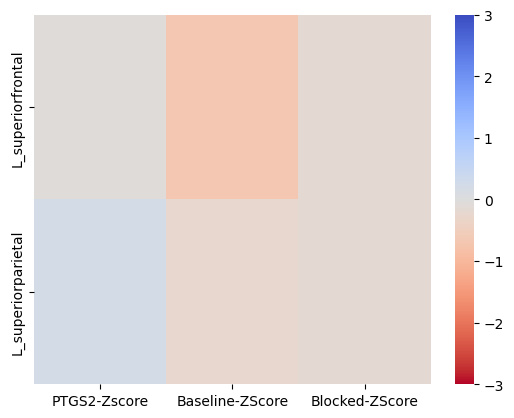

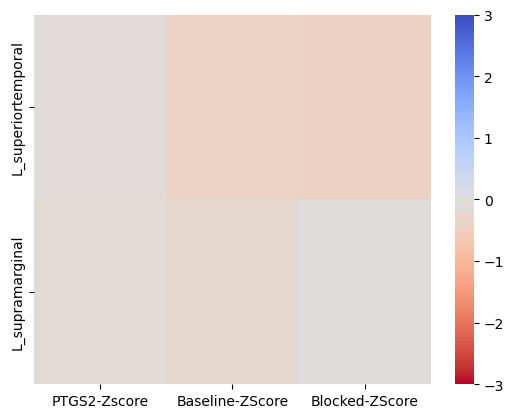

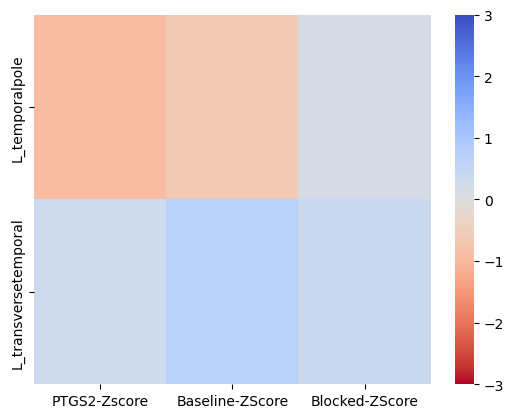

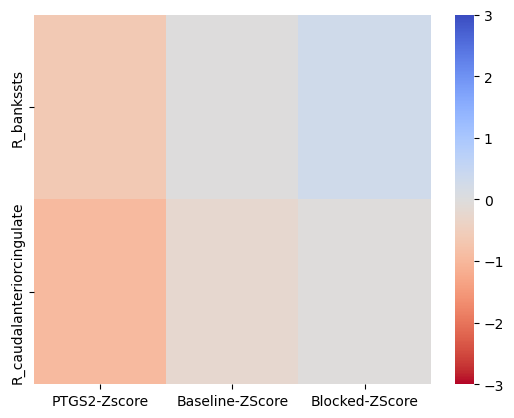

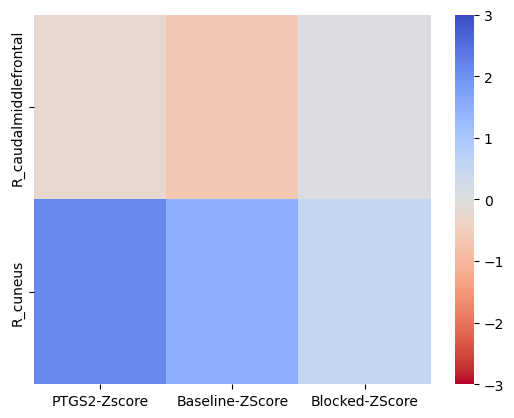

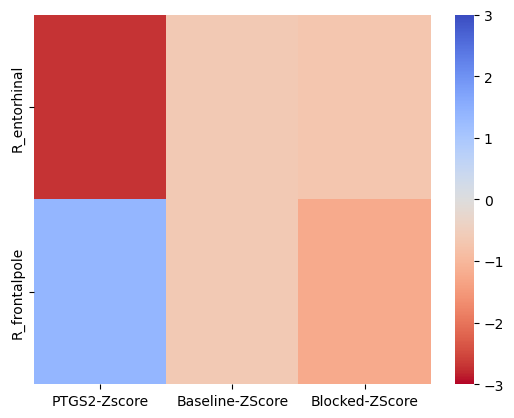

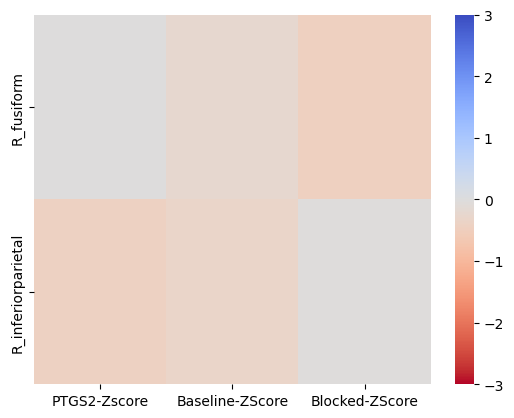

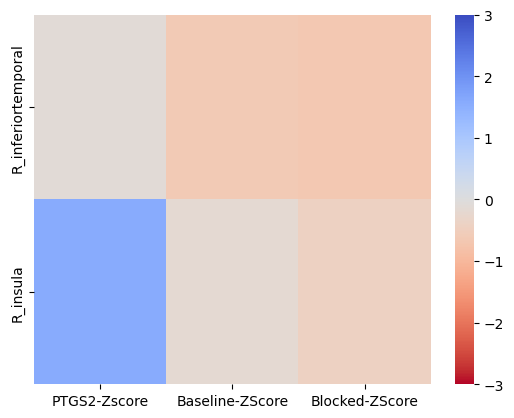

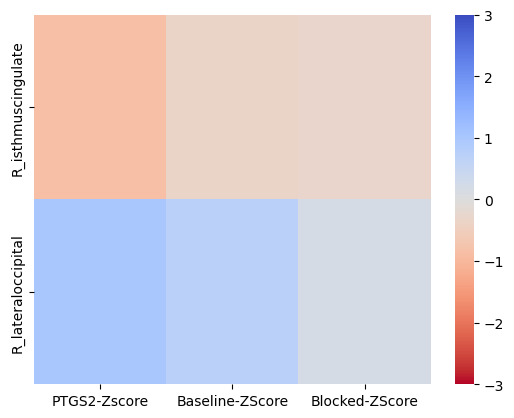

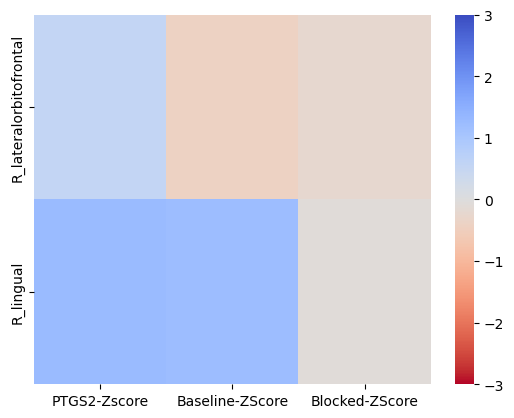

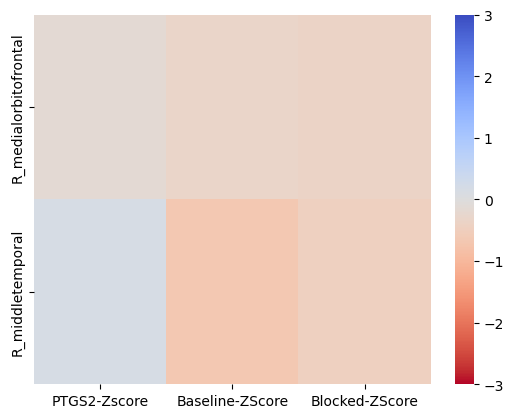

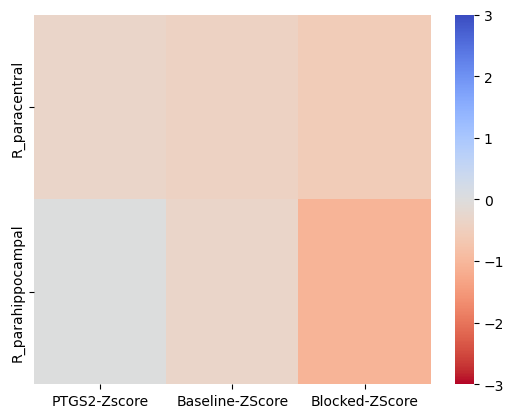

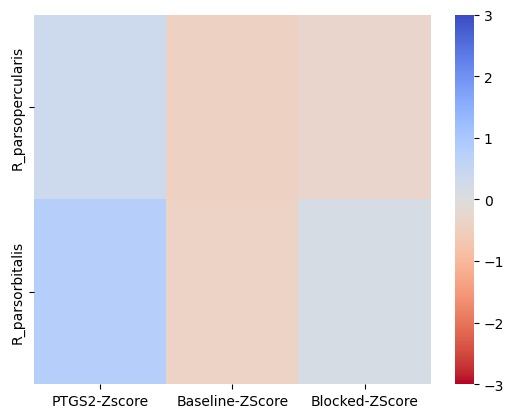

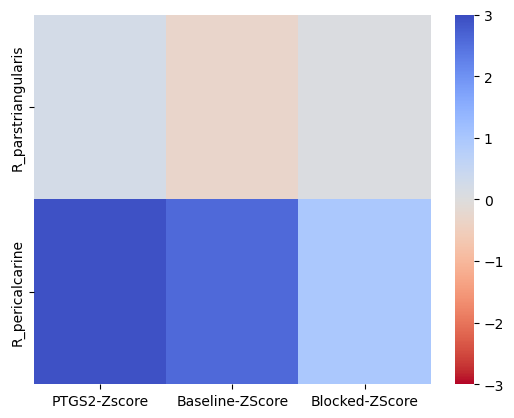

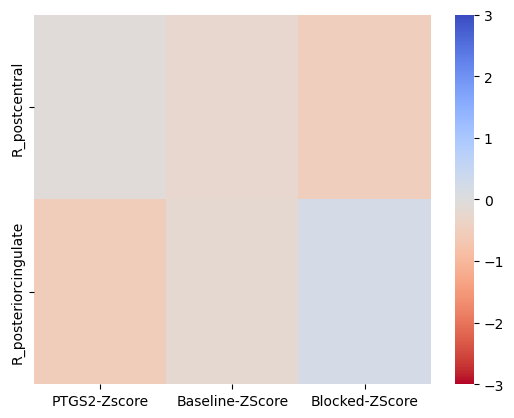

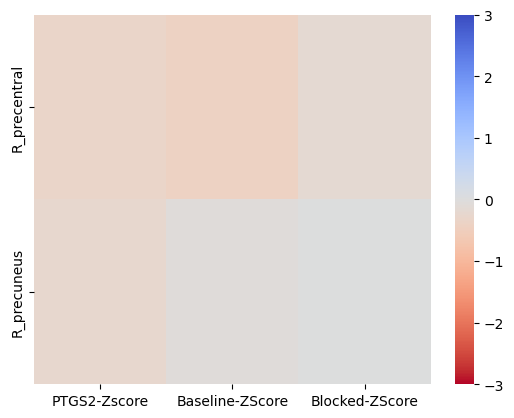

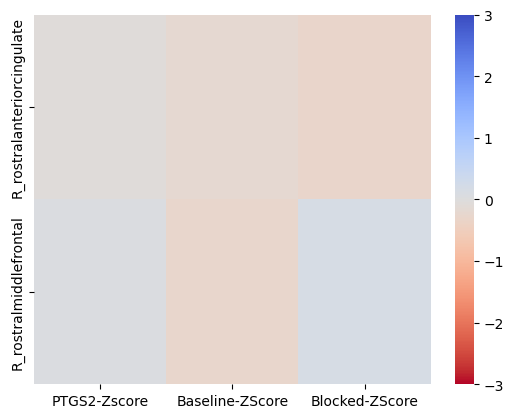

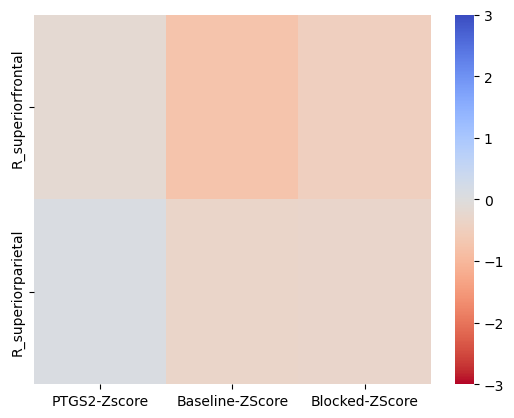

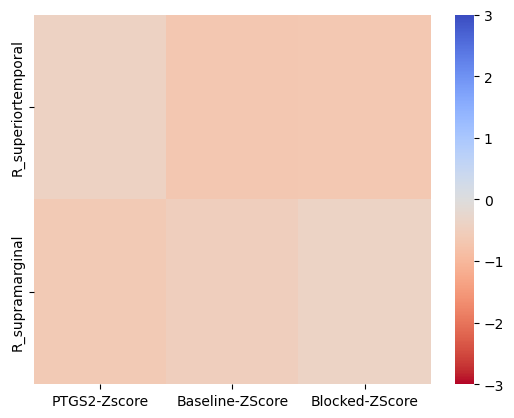

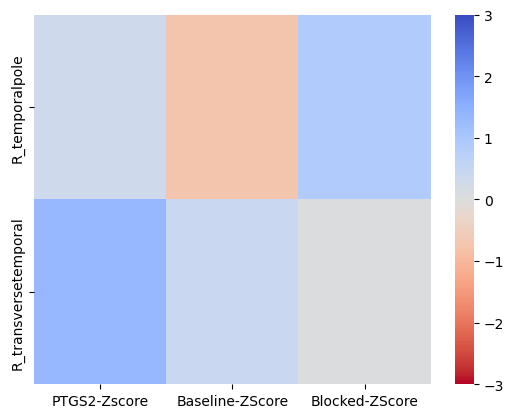

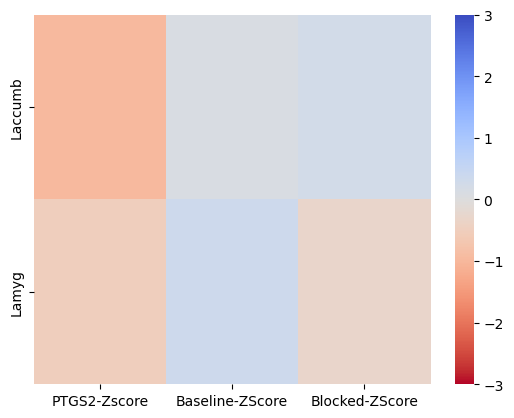

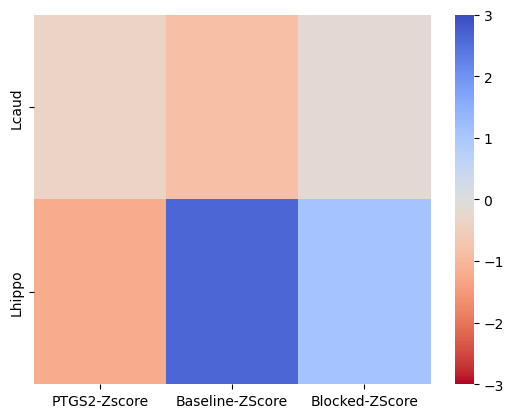

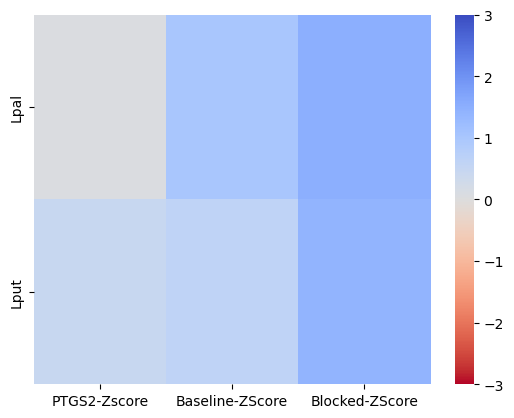

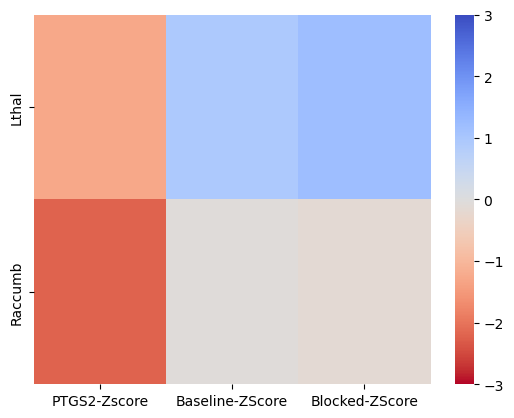

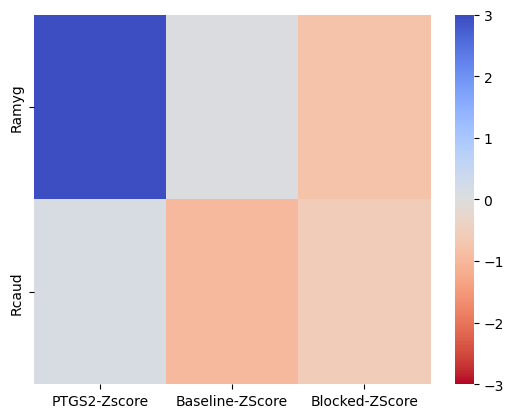

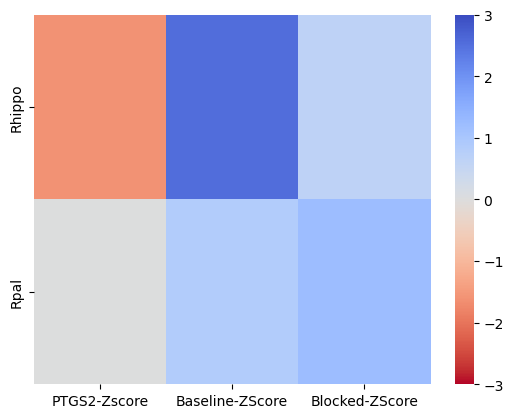

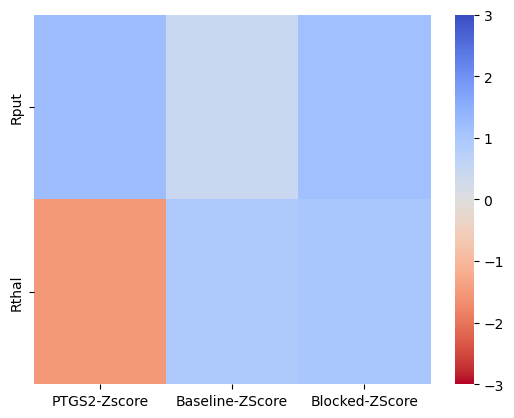

In [345]:
import matplotlib.pyplot as plt
for i in range(0, len(comparison_df.index), 2):
    sns.heatmap(comparison_df.loc[comparison_df.index[i:i+2]],
                vmax=3, vmin=-3, cmap='coolwarm_r', annot=False,
                )
    plt.show()

In [217]:
df = pd.read_csv('/Users/ianliu/Medical Research/Data/17-plus7/derivatives/subj_z_score.csv', index_col=0)
# df = df[df['ses'] == 'blockedbrain']
df = df[df['ses'] == 'baselinebrain']
df = df.drop(columns=['ses', 'sub'])
df = df.mean(axis=0).to_frame('0')
df

0
brain_stem                      0.122631
csf                            -1.226830
csf_extracerebral              -1.393026
ctx_lh_bankssts                 0.090194
ctx_lh_caudalanteriorcingulate -0.104284
...                                  ...
right_ventraldc                 0.871964
skull                          -0.525637
vermis                         -0.561966
LLatVent                             NaN
RLatVent                             NaN

[103 rows x 1 columns]

In [40]:
df = pd.read_csv('/Users/ianliu/Medical Research/Data/17-plus7/derivatives/subj_z_score.csv', index_col=0)
df = df[df['ses'] == 'blockedbrain']
# df = df[df['ses'] == 'baselinebrain']
df = df.drop(columns=['ses', 'sub'])
df = df.mean(axis=0).to_frame('0')
df

0
brain_stem                     -0.666199
csf                            -2.478410
csf_extracerebral              -1.440941
ctx_lh_bankssts                 0.336863
ctx_lh_caudalanteriorcingulate  0.428411
...                                  ...
skull                           3.718910
vermis                         -0.301102
hippocampus                     0.845638
LLatVent                             NaN
RLatVent                             NaN

[104 rows x 1 columns]

In [ ]:
ptgs2